## 📌 **Customer Churn Prediction using Machine Learning**

### **Introduction**
Customer churn represents a major challenge in the telecommunications industry. It refers to the percentage of customers who discontinue their services over a given period. Accurately predicting churn enables businesses to implement targeted retention strategies, reducing revenue loss and improving customer satisfaction.

### **Project Objective**
The goal of this project is to develop a machine learning model that predicts whether a customer is likely to churn, based on service usage, billing information, and demographic attributes.

### **Dataset Source**
The dataset used is the **IBM Telco Customer Churn dataset**, originally published on Kaggle. It includes information from 7,043 customers, covering demographics, account details, subscribed services, and billing behavior.

📎 Full project and dataset available on GitHub:  
[IBM-Telco-Churn-Prediction](https://github.com/amharringthon/IBM-Telco-Churn-Prediction)

### **Dataset Overview**
- **Target Variable:** `Churn Label` (`0` = Not Churned, `1` = Churned)
- **Key Features:**
  - **Demographics:** Gender, Senior Citizen, Partner, Dependents  
  - **Account Info:** Tenure Months, Contract Type, Payment Method  
  - **Services:** Internet Service, Tech Support, Streaming TV, Online Security  
  - **Billing:** Monthly Charges, Total Charges, CLTV (Customer Lifetime Value)  

### **Machine Learning Approach**
This notebook follows an end-to-end machine learning pipeline:

1. Exploratory Data Analysis (EDA)  
2. Data Preprocessing (encoding, scaling, imbalance handling)  
3. Model Training & Evaluation (Logistic Regression, Random Forest, XGBoost, LightGBM)  
4. Hyperparameter Tuning using **Optuna**  
5. Model Assessment (accuracy, recall, F1-score, AUC, feature importance)  
6. Model Deployment and Testing  

---

### ✅ **Expected Outcomes**
- Identify key variables influencing churn  
- Select a high-performing model for churn prediction  
- Provide a deployable solution to support proactive retention strategies


In [1]:
# LIBRARIES USED IN THIS PROJECT

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation and metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score
)

# Oversampling
from imblearn.over_sampling import SMOTE

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import optuna

# Model exporting
import joblib
import os

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Optional: Suppress warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 📥 **Data Loading and Initial Exploration**

The **Telco Customer Churn** dataset is loaded and explored to understand its structure and content.  
This step involves:

- Displaying the first few rows of the dataset  
- Reviewing column data types to distinguish between numerical and categorical variables  
- Generating summary statistics to analyze value ranges and distributions  
- Counting unique values per column to assess cardinality  
- Identifying missing values and duplicate records to detect potential data quality issues

🔍 These initial insights help guide the data cleaning and preprocessing strategy in the next steps.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/IBM-Telco-Churn-Prediction/refs/heads/main/data/Telco_customer_churn.csv")
df.head() # Displaying the first 5 rows of the dataset to get an overview

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# Display information about the dataset, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### 🧾 **Info Output Observations**

- The dataset contains **7,043 rows** and **33 columns**.  
- There are **24 categorical (object)** columns, **6 integer**, and **3 float** columns.  
- The **`Total Charges`** column is incorrectly stored as an **object** (string) type instead of numeric.  
  - 🔧 This column should be **converted to float** to allow for proper numerical analysis and modeling.


In [4]:
# Display summary statistics for numerical columns: This includes count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### 📊 **Describe Output Observations**

- **Tenure Months** ranges from **0 to 72**, representing customer tenure in months (up to 6 years).
- **Monthly Charges** vary significantly, from approximately **$18 to $119**, suggesting a wide range of service plans.
- **Churn Value** is binary (`0` or `1`), confirming it can be used as the **target variable** for prediction.
- **Churn Score** and **CLTV (Customer Lifetime Value)** are continuous numeric variables that may be useful for **customer segmentation** or **predictive modeling**.


In [5]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

### 🔢 **Nunique Output Observations**

- **CustomerID** has **7,043 unique values**, which is expected since it serves as a **unique identifier** for each customer.
- **Count**, **Country**, and **State** each have only **1 unique value**. These columns provide no variability and can be **dropped**.
- **City**, **Zip Code**, **Lat Long**, **Latitude**, and **Longitude** have **very high cardinality**. While potentially useful for **geo-based segmentation**, they are likely too granular for modeling and may introduce noise.
- **Gender**, **Senior Citizen**, **Partner**, and **Dependents** are **binary categorical features** with **2 distinct values** each.
- Features like **Multiple Lines**, **Internet Service**, **Online Security**, etc., have **3 unique values**, likely corresponding to `"Yes"`, `"No"`, and `"No Internet Service"`.
- **Contract** has **3 types**, and **Payment Method** has **4 options**, making them low-cardinality categorical features suitable for encoding.
- **Monthly Charges** has **1,585 unique values**, confirming it is a **continuous numeric variable**.
- **Total Charges** has **6,531 unique values** and is currently stored as an **object** type; it should be **converted to numeric** for analysis.
- **Churn Label** and **Churn Value** are **binary target variables**—one in **categorical**, the other in **numeric** format.
- **Churn Reason** contains **20 unique churn causes**. Although many entries are missing, the column may still offer **interpretative value** in visualizations or summary tables.


In [6]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### 🔍 **Missing Values (isnull) Output Observations**

- Most columns have **no missing values**, indicating that the dataset is **generally clean and well-prepared**.
- Only the **`Churn Reason`** column contains missing values: **5,174 out of 7,043 rows**.
- This suggests that `Churn Reason` is provided **only for customers who actually churned**, making it more of a **post-churn explanatory variable** rather than a usable feature for predictive modeling.


In [7]:
df.duplicated().sum()

0

### 📌 **Duplicate Records Check**

- There are **no duplicated rows** in the dataset.
- This confirms that each record (customer) is **unique**, which is expected since **`CustomerID`** serves as a **unique identifier**.


### 🧹 **Data Cleaning**

Columns that are either **irrelevant for modeling** or **directly related to the target variable** are removed to avoid data leakage and reduce noise.

The following types of columns were dropped:

- 🔸 **No variability:** Columns like `Count`, `Country`, and `State` contain the same value for all rows and offer no predictive power.  
- 🔸 **High-cardinality or overly granular data:** Columns like `Zip Code`, `Lat Long`, `Latitude`, and `Longitude` may introduce unnecessary complexity and are not aggregated in a meaningful way.  
- 🔸 **Identifiers:** `CustomerID` is a unique identifier and should not be used for learning patterns.  
- 🔸 **Target-related columns:** `Churn Value`, `Churn Score`, and `Churn Reason` reference the target outcome and could lead to **data leakage** if included during training.

✅ After dropping these columns, the dataset retains only the features that allow the model to learn meaningful patterns **without being exposed to the answers**.


In [8]:
# Drop irrelevant and target-related columns
columns_to_drop = [
    'CustomerID',     # unique identifier
    'Count',          # constant value across all rows
    'Country',        # only one country present
    'State',          # single value
    'Lat Long',       # too granular for modeling
    'Zip Code',       # high cardinality
    'Churn Score',    # score already related to target
    'Churn Reason',   # only available post-churn
    'Churn Value'     # duplicate of target in numeric form
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


### 🔧 **Handling `Total Charges`**

The **`Total Charges`** column, while numeric in nature, is initially stored as an **object (string)** due to formatting issues in the raw data.

- It is **converted to a numeric data type** to ensure compatibility with mathematical operations and modeling.
- Any **missing values** introduced during conversion (e.g., due to empty strings or invalid entries) are handled by **imputing with the median** value of the column.

✅ After this step, the dataset is **fully cleaned**, with consistent types and no critical missing data — making it ready for **exploratory analysis** and **feature engineering**.


In [9]:
# Convert 'Total Charges' to numeric; non-convertible values are set to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check how many missing values were introduced by the conversion
missing_total_charges = df['Total Charges'].isnull().sum()
print(f"Missing values in 'Total Charges' after conversion: {missing_total_charges}")

# Fill missing values in 'Total Charges' with the median to preserve distribution
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

Missing values in 'Total Charges' after conversion: 11


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

### 📊 **Exploratory Data Analysis (EDA)**

In this section, we explore the key characteristics and distributions of the variables in the dataset, with a particular focus on identifying potential relationships with **customer churn**.

The analysis includes:

- A **visualization of churn distribution** to assess **class imbalance**.
- **Boxplots** of numerical variables segmented by churn status to detect patterns, trends, or outliers.
- **Count plots** for categorical variables to compare the distribution of churned vs. retained customers across different services and demographics.

🔍 These visual insights help **uncover initial patterns** and **guide feature selection** for modeling in later stages.


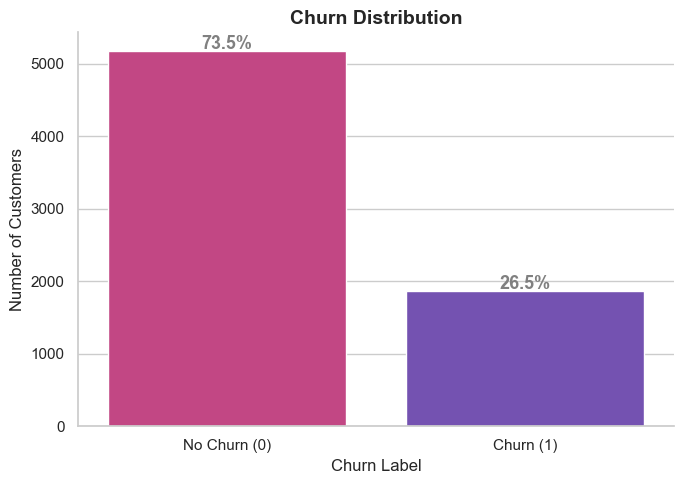

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare DataFrame for plotting
churn_data = pd.DataFrame({
    "Churn Label": ["No Churn (0)", "Churn (1)"],
    "Count": df["Churn Label"].value_counts().values,
    "Percent": df["Churn Label"].value_counts(normalize=True).values * 100
})

# Set style
sns.set(style="whitegrid")

# Custom palette
custom_palette = ["#D63384", "#6F42C1"]

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=churn_data, x="Churn Label", y="Count", palette=custom_palette)

# Add percentage labels above bars
for i, row in churn_data.iterrows():
    ax.text(i, row["Count"] + 30, f"{row['Percent']:.1f}%", ha='center', fontsize=13, fontweight='bold', color='gray')

# Labels and formatting
ax.set_ylabel("Number of Customers", fontsize=12)
ax.set_xlabel("Churn Label", fontsize=12)
ax.set_title("Churn Distribution", fontsize=14, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()


### 🔍 **Observations from the Churn Distribution Plot**

- The bar chart shows the number of customers who have **churned (`Churn = 1`)** versus those who have **remained (`Churn = 0`)**.
- The **class distribution is imbalanced**, with a noticeably higher proportion of **non-churned customers**.
- The **percentage labels above each bar** provide a clear view of this imbalance.
- This kind of imbalance is **typical in churn datasets** and should be addressed during model training — for example, by using **resampling techniques (like SMOTE)** or **applying class weights**.


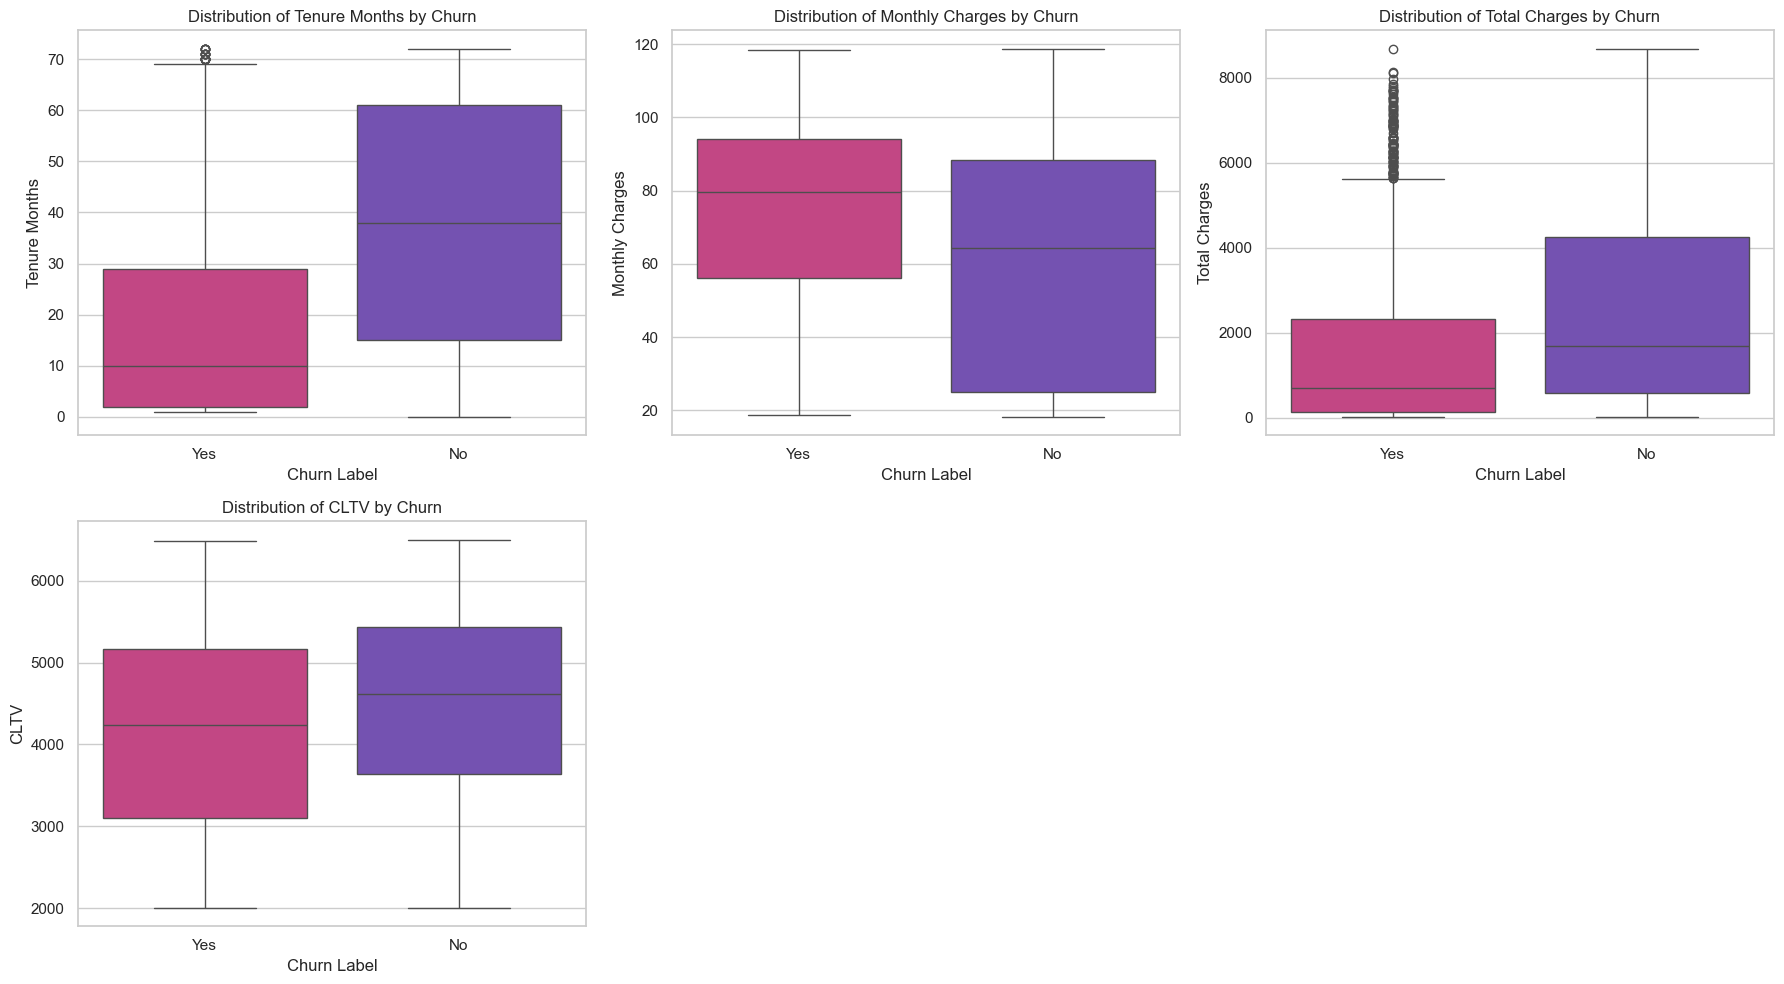

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a pink/purple color theme
custom_palette = ["#D63384", "#6F42C1"]  # Pink and Purple

# Define numerical columns to analyze
numerical_cols = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]

# Define the number of rows and columns for the subplot grid
rows = 2
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column with the corrected hue assignment
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Churn Label", y=col, data=df, hue="Churn Label", ax=axes[i], palette=custom_palette, legend=False)
    axes[i].set_title(f"Distribution of {col} by Churn", fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 📦 **Boxplot Observations – Numerical Variables by Churn**

- **Tenure Months**  
  Customers who churned tend to have **shorter tenure**, indicating they stayed with the company for fewer months.  
  🔍 This suggests that **newer customers are more likely to churn**.

- **Monthly Charges**  
  Churned customers generally have **higher monthly charges** compared to those who stayed.  
  💰 This could point to **cost sensitivity** or dissatisfaction with the **perceived value** of the service.

- **Total Charges**  
  Churned customers show **lower total charges**, which aligns with their **shorter tenure**.  
  📉 This reinforces the idea that **churn often occurs early** in the customer lifecycle.

- **CLTV (Customer Lifetime Value)**  
  Customers with **higher CLTV** are less likely to churn, while churned customers tend to show **lower lifetime value**.  
  🧠 This may reflect **reduced engagement** or a **lower perception of value**.


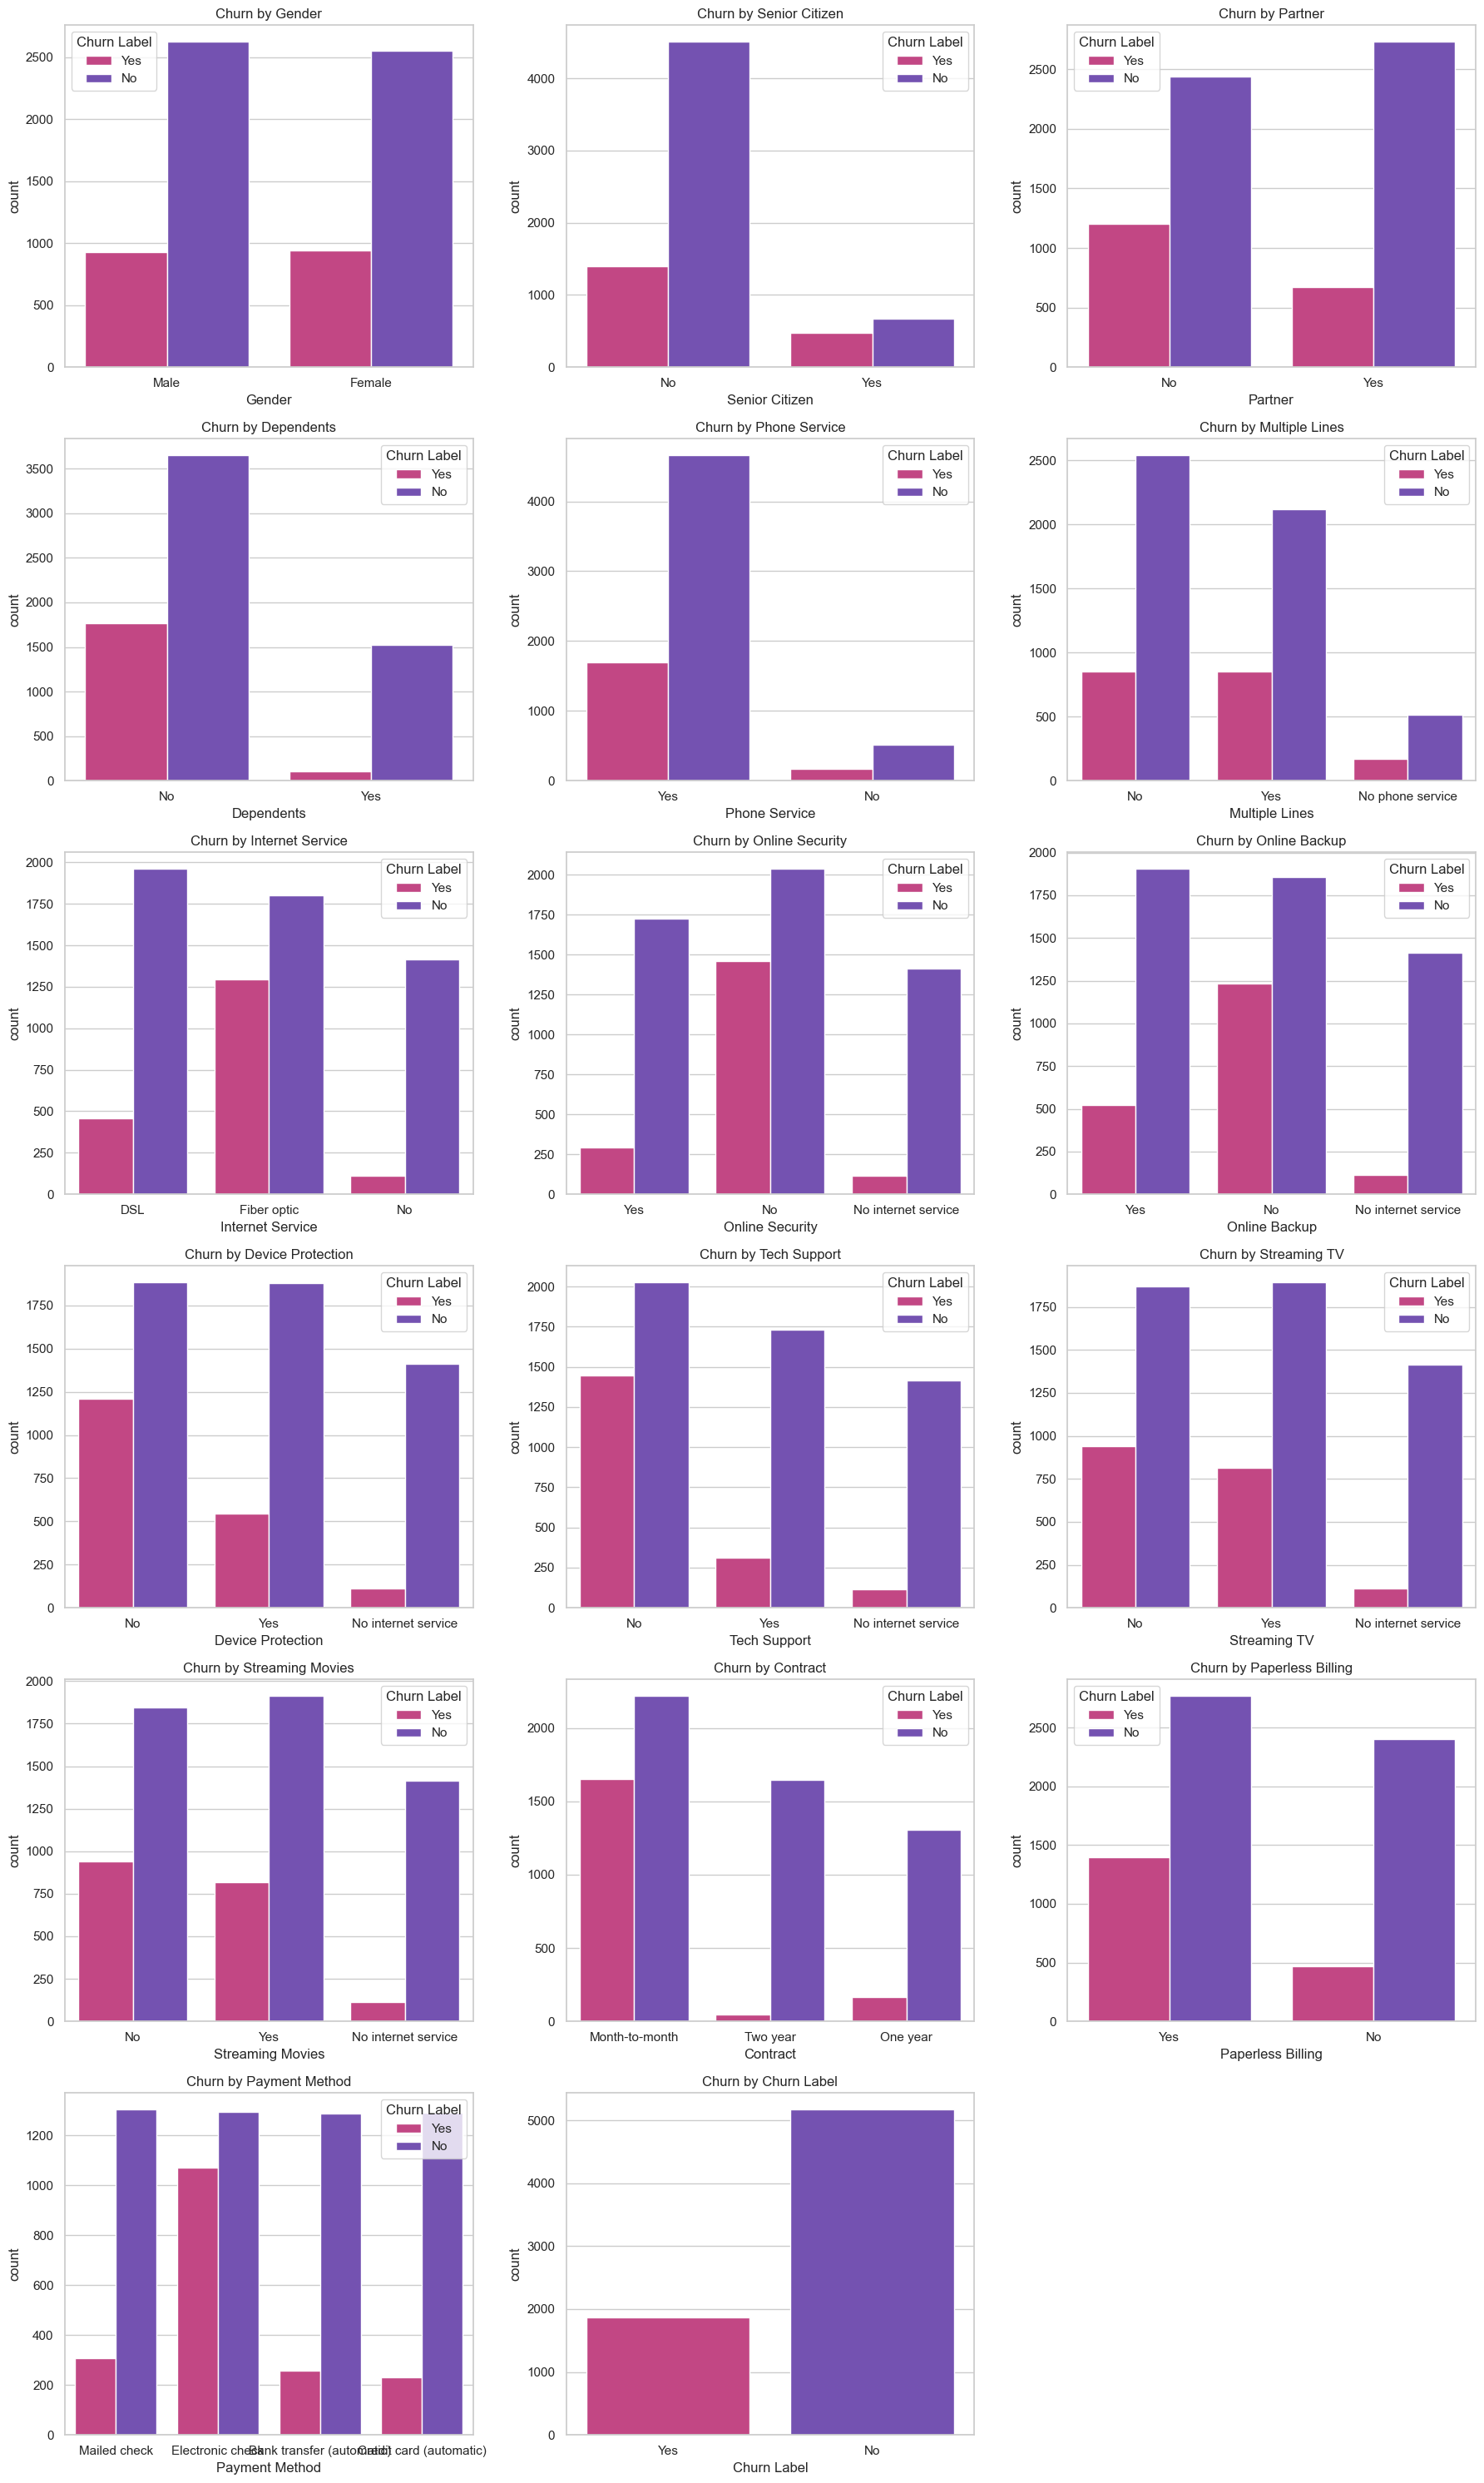

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a pink/purple color theme
custom_palette = ["#D63384", "#6F42C1"]  # Pink and Purple

# Select categorical columns (excluding those with too many unique values)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Filter out high-cardinality columns (more than 20 unique values)
categorical_cols = [col for col in categorical_cols if df[col].nunique() <= 20]

# Define the number of rows and columns for the subplot grid dynamically
num_plots = len(categorical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Ensure enough rows
cols = min(3, num_plots)  # Max 3 columns

# Create subplots dynamically based on number of categorical variables
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))  # Adjust size dynamically
axes = axes.flatten()

# Plot countplots for each categorical column with custom colors
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Churn Label", data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"Churn by {col}", fontsize=12)  # Pink title
    
    # Rotate labels for better readability if too many categories
    if df[col].nunique() > 5:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### 📊 **Categorical Feature Distributions by Churn**

- **Contract Type**  
  Customers on **month-to-month contracts** show a significantly **higher churn rate** compared to those on **one-year** or **two-year contracts**.  
  🔁 This highlights the importance of **contract length** in customer retention.

- **Internet Service & Online Security**  
  Churn is more frequent among customers with **no internet service** or **no online security**.  
  🔒 This suggests that **limited service usage** may relate to **lower engagement** and **higher churn**.

- **Tech Support & Device Protection**  
  The absence of **tech support** and **device protection** is associated with **increased churn**, possibly indicating **unmet support needs** or **perceived value issues**.

- **Payment Method**  
  Customers using **electronic check** are **more likely to churn** compared to those using **credit card** or **bank transfer**.  
  💳 This may reflect differences in **payment experience** or customer demographics.

- **Paperless Billing**  
  Those who opted for **paperless billing** exhibit a **higher churn rate**, which could be linked to **self-service behavior** or **different customer expectations**.

- **Multiple Lines & Streaming Services**  
  Customers **without multiple lines** or **streaming services** (TV, movies) may have **less engagement** with the product ecosystem, potentially contributing to churn.


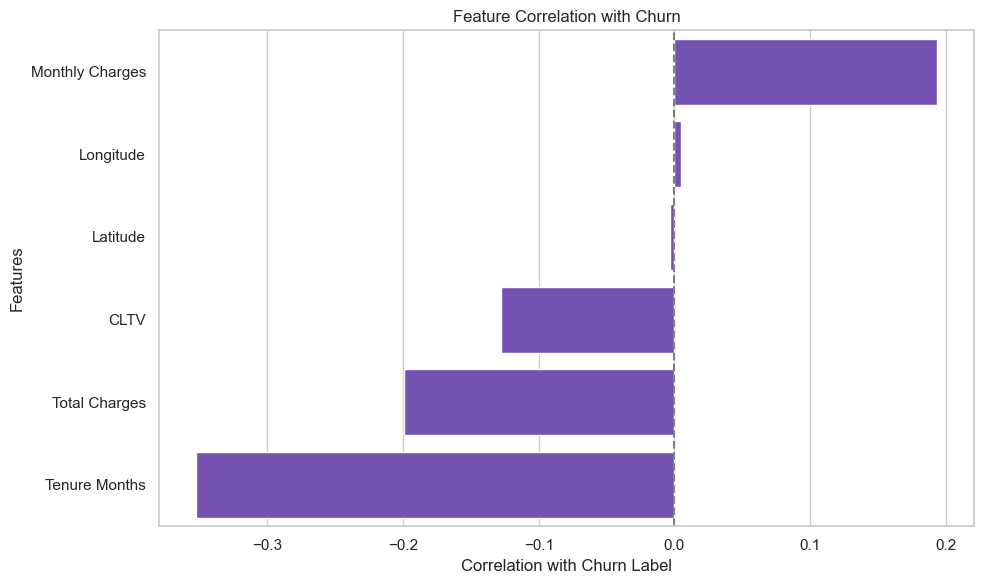

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Churn Label to numeric (0 = No Churn, 1 = Churn)
df["Churn Label"] = df["Churn Label"].replace({"No": 0, "Yes": 1}).astype(int)

# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Extract correlations with Churn Label and sort them
target_corr = corr_matrix["Churn Label"].drop("Churn Label").sort_values(ascending=False)

# Plot correlation as bar chart with purple color
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, color="#6F42C1")  # Purple color
plt.xlabel("Correlation with Churn Label")
plt.ylabel("Features")
plt.title("Feature Correlation with Churn")
plt.axvline(x=0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()


### 📈 **Feature Correlation with Churn – Key Observations**

- **Tenure Months** (~ -0.3)  
  Has the **strongest negative correlation** with churn.  
  🔹 Long-term customers are **less likely to churn**.  
  🔹 Suggests that **retention strategies** should focus on **newer customers**, who are at higher risk.

- **Monthly Charges** (~ 0.2)  
  Shows the **strongest positive correlation** with churn.  
  🔹 Customers with **higher monthly charges** are more likely to churn.  
  🔹 Indicates that **cost sensitivity** may be a key driver of churn.

- **CLTV (Customer Lifetime Value)** (~ 0.1)  
  Displays a **slight positive correlation**, which may seem **counterintuitive**.  
  🔹 Some high-value customers still choose to leave.  
  🔹 This may be related to **pricing concerns**, **competition**, or **dissatisfaction** — worth deeper investigation.

- **Total Charges** (~ -0.1 to -0.2)  
  Has a **weak negative correlation** with churn.  
  🔹 Customers who churn early naturally accumulate **fewer total charges**.  
  🔹 However, **Tenure Months** is a **stronger and more direct indicator** of churn.

- **Latitude & Longitude** (~ 0.0)  
  Show **negligible correlation** with churn.  
  🔹 Confirms that **geographic location** does not significantly impact churn.  
  🔹 These features can likely be **excluded from modeling**.


## 🛠️ Model Preprocessing

Before training the models, the dataset must be **properly prepared** to ensure compatibility with machine learning algorithms. This step transforms raw data into a format that models can understand and learn from effectively.

Key preprocessing steps include:

- 🔍 **Feature Selection**  
  Removed **redundant or non-informative columns** (e.g., IDs, high-cardinality features, target-related columns) to reduce noise and prevent data leakage.

- 🔢 **Encoding Categorical Variables**  
  - **Binary categorical features** (e.g., Yes/No) were converted using **label encoding**.
  - **Multi-category features** were transformed using **one-hot encoding** to preserve all category information.

- 📏 **Feature Scaling**  
  Applied **Min-Max Scaling** to numerical columns (e.g., `Tenure Months`, `Monthly Charges`, `Total Charges`) to bring features to a **uniform scale**, improving convergence during training.

✅ After these transformations, the dataset is **clean, consistent, and ready for model training**.

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Feature Selection: Remove unnecessary columns
columns_to_drop = [
    "CustomerID", "Count", "Country", "State", "City", "Zip Code",
    "Lat Long", "Latitude", "Longitude", "Churn Score", "Churn Reason", "Churn Value"
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Encoding Categorical Variables
# Convert binary categorical columns (Yes/No → 1/0)
binary_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# Encode Gender (0 = Male, 1 = Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encoding for multi-class categorical variables
categorical_cols = [
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Payment Method'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature Scaling (Now all features are numeric)
scaler = MinMaxScaler()
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Define target variable
y = df["Churn Label"]
X = df.drop(columns=["Churn Label"])


### 🤖 **Model Training & Evaluation**

To predict **customer churn**, multiple machine learning models were trained and evaluated. The primary goal was to identify the model that delivers the **best balance between accuracy and recall**, ensuring that high-risk customers are correctly identified.

The modeling process followed these key steps:

- **Data Splitting**  
  The dataset was split into **training (80%)** and **testing (20%)** sets to evaluate model performance on **unseen data**.

- **Model Selection**  
  Several algorithms were tested, including:  
  - **Logistic Regression**  
  - **Random Forest**  
  - **XGBoost**  
  - **LightGBM**

- **Performance Metrics**  
  Each model was evaluated using standard classification metrics:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-score**  
  Additionally, **ROC-AUC curves** and **confusion matrices** were used for visual interpretation.

- **Hyperparameter Tuning**  
  The most promising model (LightGBM) was optimized using **Optuna**, a **Bayesian optimization framework**, to fine-tune hyperparameters efficiently.

- **Final Model Selection**  
  The model with the best overall performance — particularly in **recall for churned customers** — was selected as the final model.

📌 The results, visualizations, and insights from each model are presented in the following sections.


In [16]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 📈 **Logistic Regression – Baseline Model**

Logistic Regression Accuracy: 0.8062
Cross-validation Accuracy: 0.8126

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



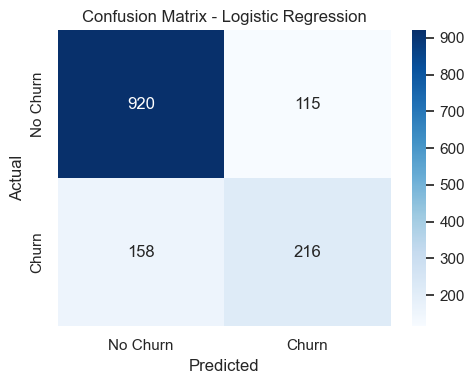

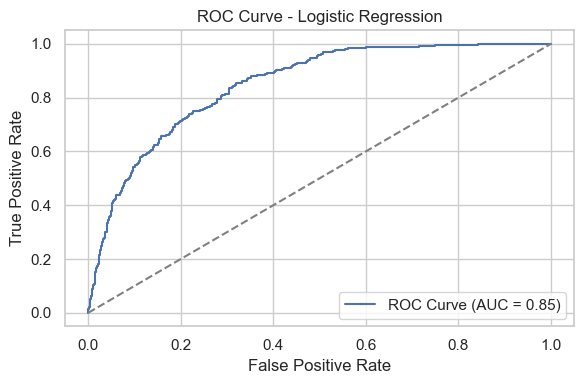

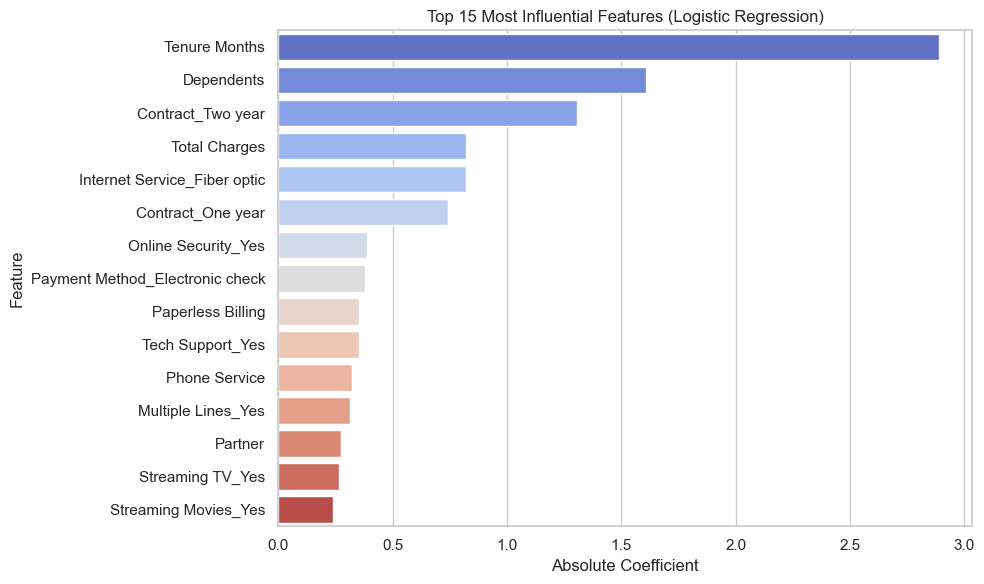

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Cross-validation Accuracy: {cv_mean:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance (coefficients)
coefficients = lr_model.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 15 influential features
plt.figure(figsize=(10, 6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=coef_df.head(15), palette="coolwarm")
plt.title("Top 15 Most Influential Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()
plt.show()

Logistic Regression was selected as a baseline model due to its simplicity and interpretability. The model was trained using the cleaned and preprocessed dataset.

#### **📌 Evaluation Results:**  
- **Accuracy:** **80.62%**  
- **Cross-validation score:** **80.97%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **85%**  
    - Recall: **89%**  
    - F1-score: **87%**  
  - **Churned Customers (1):**  
    - Precision: **65%**  
    - Recall: **58%**  
    - F1-score: **61%**

- The **ROC Curve** shows an **AUC of 0.85**, indicating good model performance in distinguishing churn vs. non-churn customers.

#### **📊 Feature Importance**  
The logistic regression model provides insight into which variables have the most significant impact on churn:  
- **Tenure Months**, **Dependents**, and **Contract Type** are the most influential factors.  
- **Higher tenure is strongly associated with customer retention**, while shorter tenure increases churn probability.  
- **Internet Service Type** and **Online Security** also contribute to churn likelihood.

### 🔍 **Observations & Next Steps:**  
- Logistic Regression performs well as a baseline, especially in terms of **accuracy and interpretability**.  
- However, it **struggles with recall for churned customers (58%)**, which is critical in churn prediction scenarios.  
- This imbalance suggests the need to handle the **class imbalance issue** before exploring more complex models.  
- The next step is to apply **SMOTE** to improve recall and test whether it enhances model sensitivity to churn cases.


### 📈 **Logistic Regression with SMOTE** 

Logistic Regression (SMOTE) Accuracy: 0.7452
Cross-validation Accuracy: 0.7981

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



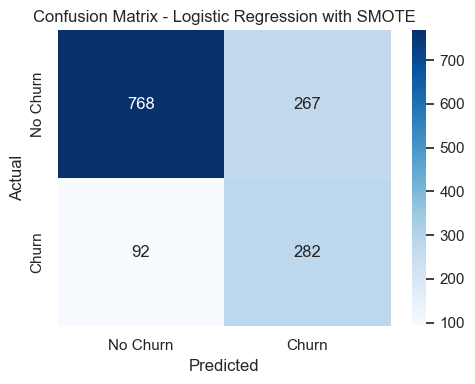

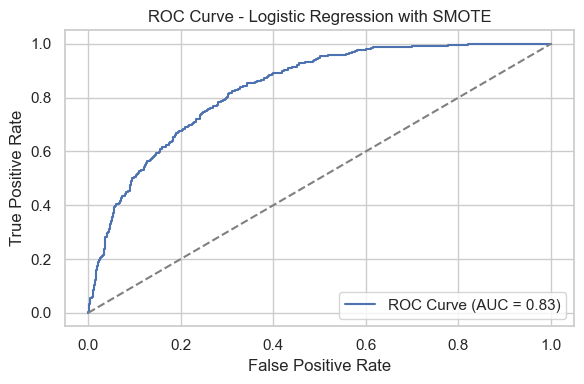

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2141947575.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Abs_Coefficient", y="Feature", data=coef_df_smote.head(15), palette="coolwarm")


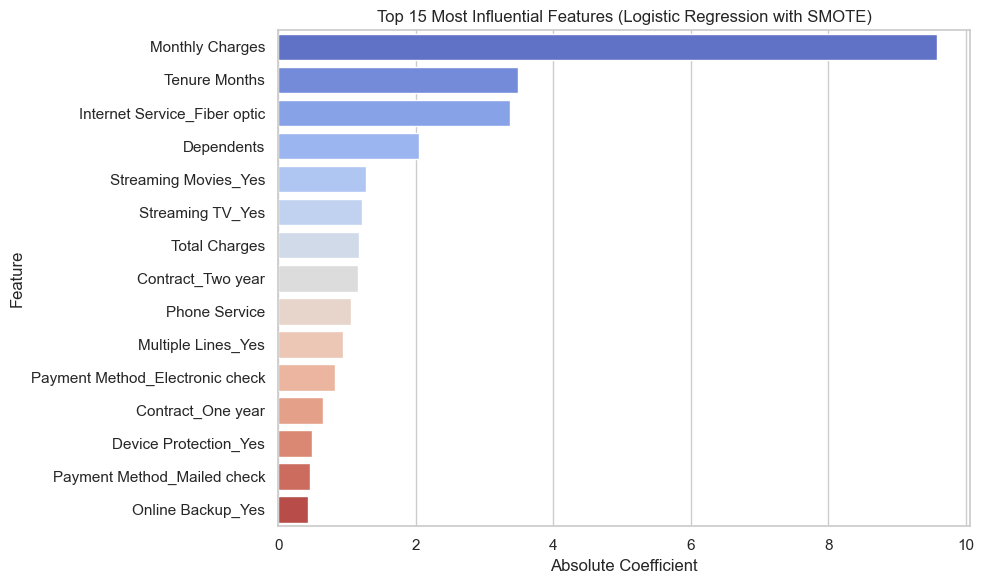

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model
lr_smote_model = LogisticRegression(max_iter=1000)
lr_smote_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_smote = lr_smote_model.predict(X_test)
y_proba_smote = lr_smote_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_smote = cross_val_score(lr_smote_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
cv_mean_smote = np.mean(cv_scores_smote)

# Evaluation metrics
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Logistic Regression (SMOTE) Accuracy: {accuracy_smote:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_smote:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_proba_smote)
plt.figure(figsize=(6, 4))
plt.plot(fpr_smote, tpr_smote, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_smote):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance (coefficients)
coefficients_smote = lr_smote_model.coef_[0]
coef_df_smote = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients_smote})
coef_df_smote['Abs_Coefficient'] = np.abs(coef_df_smote['Coefficient'])
coef_df_smote = coef_df_smote.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 15 influential features
plt.figure(figsize=(10, 6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=coef_df_smote.head(15), palette="coolwarm")
plt.title("Top 15 Most Influential Features (Logistic Regression with SMOTE)")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()


To address class imbalance, **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to the training dataset before training the logistic regression model. This technique generates synthetic samples for the minority class (churned customers) to improve model performance.

#### **📌 Evaluation Results:**  
- **Accuracy:** **74.52%**  
- **Cross-validation score:** **79.81%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **89%**  
    - Recall: **74%**  
    - F1-score: **81%**  
  - **Churned Customers (1):**  
    - Precision: **51%**  
    - Recall: **75%**  
    - F1-score: **61%**

- The **ROC Curve** shows an **AUC of 0.83**, indicating a good ability to distinguish between churned and non-churned customers.

#### **📊 Observations from Confusion Matrix**  
- **Recall for churned customers improved significantly (from 58% to 75%)**, meaning the model became better at identifying customers likely to churn.  
- **Precision for churned customers dropped to 51%**, meaning more false positives occurred.  
- This is a common trade-off when using SMOTE: better recall, but reduced precision.

#### **📊 Feature Importance**  
By analyzing model coefficients, we observe that:  
- **Contract Type**, **Tenure Months**, and **Monthly Charges** are among the most important features.  
- **SMOTE improved sensitivity** to actual churn but introduced some noise via synthetic samples.  
- The trade-off may be acceptable depending on the business need (e.g., recall vs. precision).

### 🔍 **Observations & Next Steps:**  
- **SMOTE improved recall**, making the model more effective in capturing true churn cases.  
- **Precision decreased**, resulting in more false churn predictions.  
- The next step is testing more powerful models like **Random Forest** to seek better balance between recall and precision.

### 🌲 **Random Forest – Non-SMOTE Model** 

Random Forest Accuracy: 0.7956
Cross-validation Accuracy: 0.7975

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



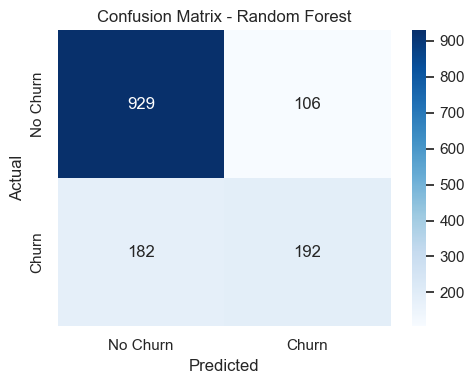

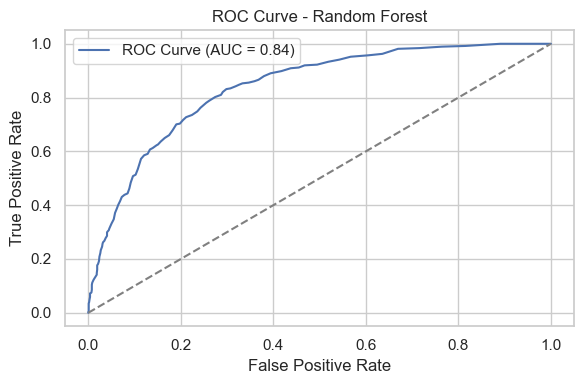

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\544618194.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_rf.head(15), palette="coolwarm")


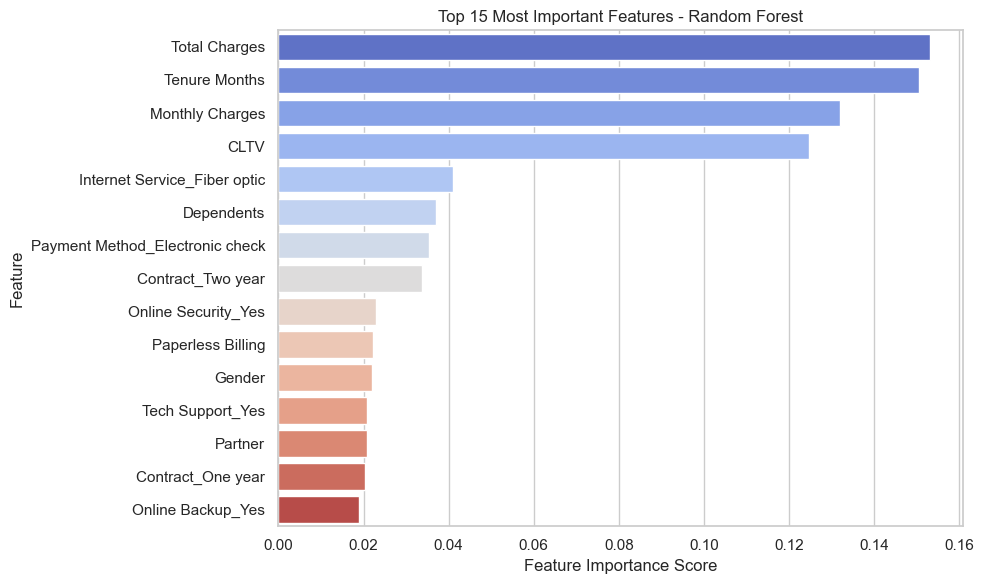

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_rf = np.mean(cv_scores_rf)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_rf:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_rf = rf_model.feature_importances_
feature_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_df_rf = feature_df_rf.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_rf.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()



Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions. It is often more robust than logistic regression and can capture complex relationships in the data.

#### **📌 Evaluation Results:**  
- **Accuracy:** **79.56%**  
- **Cross-validation score:** **79.75%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **84%**  
    - Recall: **90%**  
    - F1-score: **87%**  
  - **Churned Customers (1):**  
    - Precision: **64%**  
    - Recall: **51%**  
    - F1-score: **57%**

- The **ROC Curve** shows an **AUC of 0.84**, indicating solid model performance in distinguishing between churned and non-churned customers.

#### **📊 Observations from Confusion Matrix**  
- **Recall for churned customers (51%)** is relatively low, meaning the model fails to detect many actual churn cases.  
- **Precision (64%)** is higher than Logistic Regression with SMOTE, indicating fewer false positives.  
- This model is more conservative in predicting churn, favoring precision over recall.

#### **📊 Feature Importance**  
- The most important features include:  
  - **Total Charges**, **Tenure Months**, and **Monthly Charges**.  
- These financial and tenure-based variables strongly influence churn prediction.

### 🔍 **Observations & Next Steps:**  
- While Random Forest improves precision, it sacrifices recall, which could limit its effectiveness in churn prevention strategies.  
- The next step is to apply **SMOTE** and retrain the model to evaluate if recall improves without significantly harming precision.

### 🌲 **Random Forest with SMOTE**

Random Forest (SMOTE) Accuracy: 0.7644
Cross-validation Accuracy: 0.8520

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



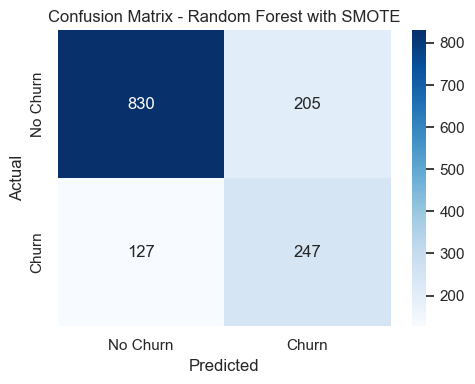

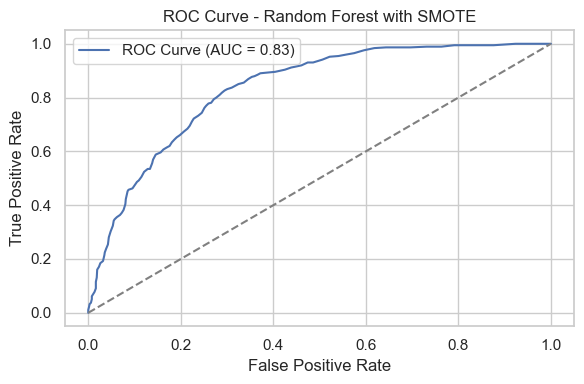

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\1821337791.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_rf_smote.head(15), palette="coolwarm")


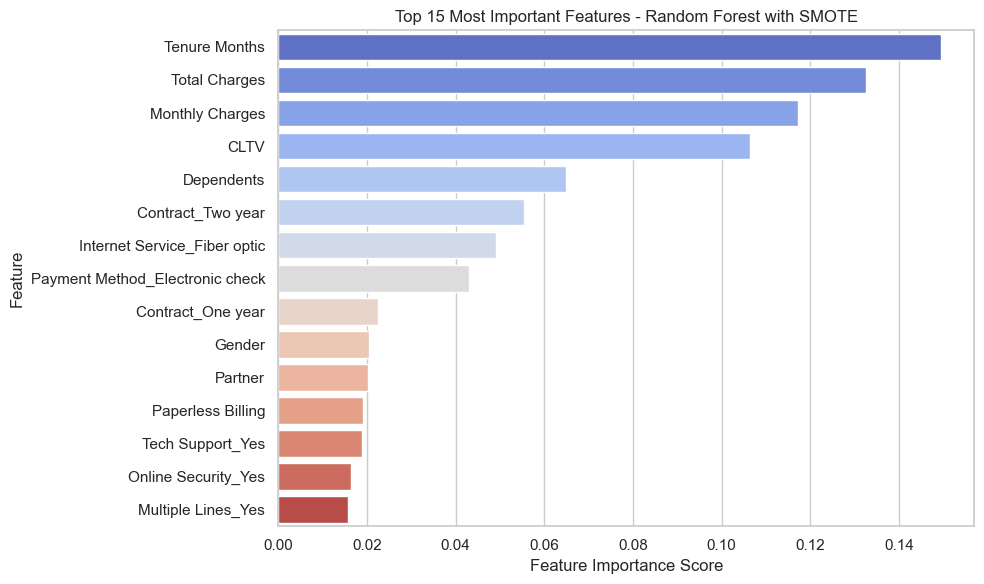

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train, y_train)

# Initialize and train the model
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_resampled_rf, y_resampled_rf)

# Predictions
y_pred_rf_smote = rf_smote_model.predict(X_test)
y_proba_rf_smote = rf_smote_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_rf_smote = cross_val_score(rf_smote_model, X_resampled_rf, y_resampled_rf, cv=5, scoring='accuracy')
cv_mean_rf_smote = np.mean(cv_scores_rf_smote)

# Evaluation metrics
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"Random Forest (SMOTE) Accuracy: {accuracy_rf_smote:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_rf_smote:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_test, y_proba_rf_smote)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_rf_smote):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_rf_smote = rf_smote_model.feature_importances_
feature_df_rf_smote = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf_smote})
feature_df_rf_smote = feature_df_rf_smote.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_rf_smote.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - Random Forest with SMOTE")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


The Random Forest model was retrained using **SMOTE (Synthetic Minority Over-sampling Technique)** to improve the model's ability to identify churned customers.

#### **📌 Evaluation Results:**  
- **Accuracy:** **76.44%**  
- **Cross-validation score:** **85.20%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **87%**  
    - Recall: **80%**  
    - F1-score: **83%**  
  - **Churned Customers (1):**  
    - Precision: **55%**  
    - Recall: **66%**  
    - F1-score: **60%**

- **AUC:** **0.83**, showing consistent classification performance.

#### **📊 Observations**  
- **Recall for churned customers increased from 51% to 66%**, indicating improved detection of at-risk users.  
- **Precision decreased from 64% to 55%**, resulting in more false positives.  
- This trade-off may be acceptable depending on the business goal (e.g., maximizing retention).

#### **📊 Feature Importance**  
- Top predictive features include **Tenure Months**, **Total Charges**, **Monthly Charges**, and **CLTV**.

### 🔍 **Next Steps:**  
- Consider **hyperparameter tuning** to further improve the balance between recall and precision.  
- Proceed with testing **XGBoost**, which may offer enhanced performance for complex patterns.


### ⚡ **XGBoost – Non-SMOTE Model** 

XGBoost Accuracy: 0.7828
Cross-validation Accuracy: 0.7898

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



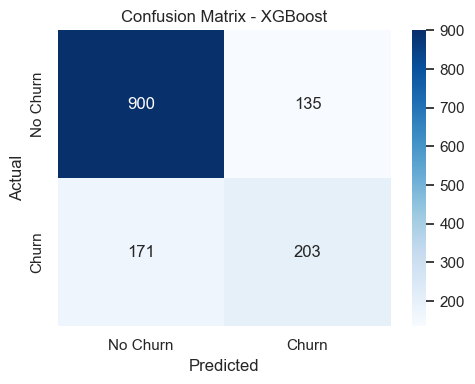

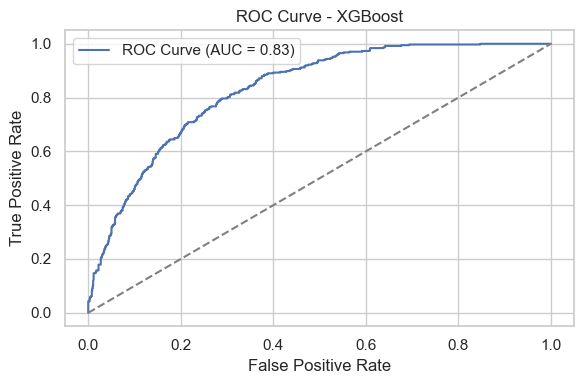

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2788555991.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_xgb.head(15), palette="coolwarm")


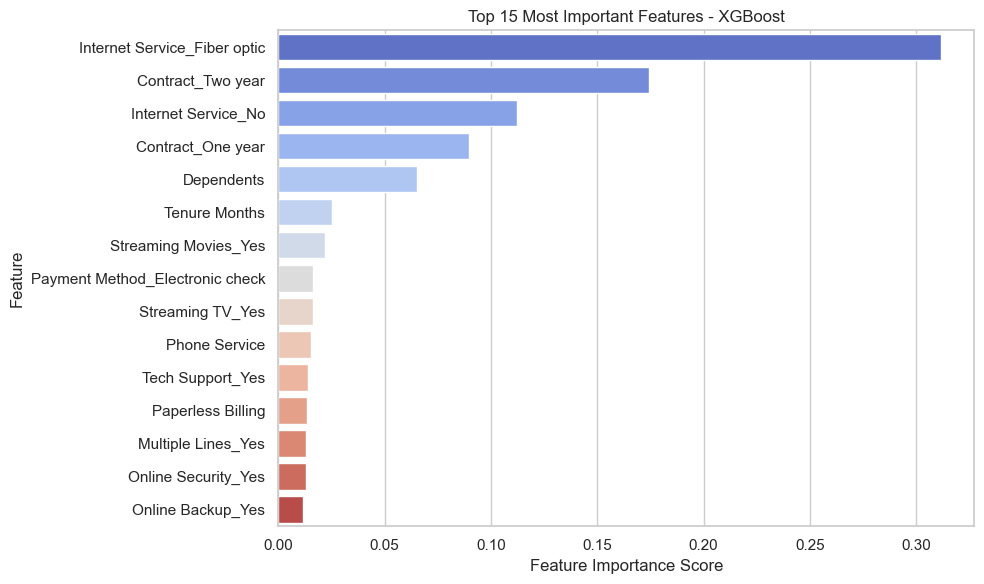

In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_xgb = np.mean(cv_scores_xgb)

# Evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_xgb:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_xgb = xgb_model.feature_importances_
feature_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})
feature_df_xgb = feature_df_xgb.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_xgb.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - XGBoost")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


XGBoost (Extreme Gradient Boosting) is a high-performance boosting algorithm known for capturing complex, nonlinear patterns in structured data. This model was trained without any class balancing techniques.

#### **📌 Evaluation Results:**  
- **Accuracy:** **78.28%**  
- **Cross-validation score:** **78.98%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **84%**, Recall: **87%**, F1-score: **85%**  
  - **Churned Customers (1):**  
    - Precision: **60%**, Recall: **54%**, F1-score: **57%**

- **AUC:** **0.83**, indicating strong discriminative power.

#### **📊 Observations**  
- Compared to previous models, XGBoost achieves a **better balance between recall and precision** for churned customers.  
- Its ability to model **nonlinear relationships** results in competitive performance without oversampling.  

#### **📊 Feature Importance**  
- The most important features include **Internet Service**, **Contract Type**, and **Dependents**.

### 🔍 **Next Steps:**  
- To further improve recall, we will apply **SMOTE** to rebalance the dataset and evaluate its effect on model performance.


### ⚡ **XGBoost with SMOTE** 

XGBoost (SMOTE) Accuracy: 0.7715
Cross-validation Accuracy: 0.8311

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



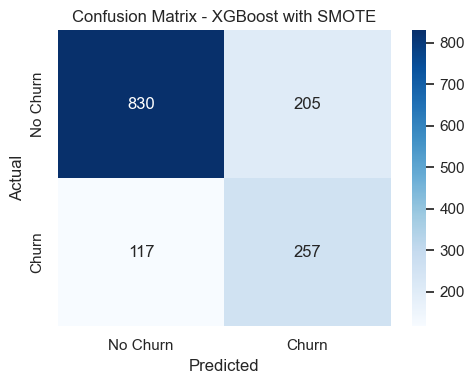

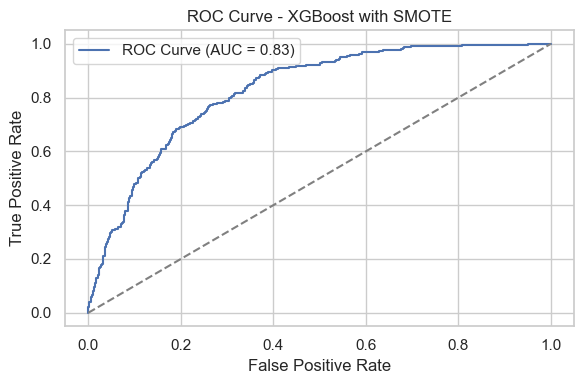

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3492695077.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_xgb_smote.head(15), palette="coolwarm")


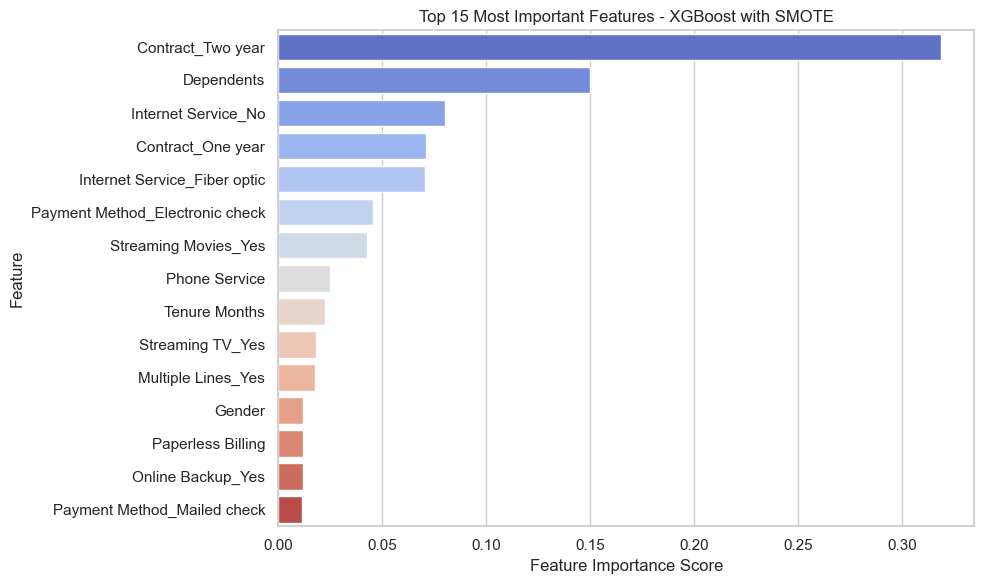

In [69]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled_xgb, y_resampled_xgb = smote.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model
xgb_smote_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb_smote_model.fit(X_resampled_xgb, y_resampled_xgb)

# Predictions
y_pred_xgb_smote = xgb_smote_model.predict(X_test)
y_proba_xgb_smote = xgb_smote_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_xgb_smote = cross_val_score(xgb_smote_model, X_resampled_xgb, y_resampled_xgb, cv=5, scoring='accuracy')
cv_mean_xgb_smote = np.mean(cv_scores_xgb_smote)

# Evaluation metrics
accuracy_xgb_smote = accuracy_score(y_test, y_pred_xgb_smote)
print(f"XGBoost (SMOTE) Accuracy: {accuracy_xgb_smote:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_xgb_smote:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost with SMOTE")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_xgb_smote, tpr_xgb_smote, thresholds_xgb_smote = roc_curve(y_test, y_proba_xgb_smote)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb_smote, tpr_xgb_smote, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_xgb_smote):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost with SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_xgb_smote = xgb_smote_model.feature_importances_
feature_df_xgb_smote = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb_smote})
feature_df_xgb_smote = feature_df_xgb_smote.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_xgb_smote.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - XGBoost with SMOTE")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


To improve recall for churned customers, **SMOTE** was applied prior to training the XGBoost model. This addresses class imbalance by generating synthetic examples of the minority class.

#### **📌 Evaluation Results:**  
- **Accuracy:** **77.15%**  
- **Cross-validation score:** **83.11%**  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned (0):** Precision: **88%**, Recall: **80%**, F1-score: **84%**  
  - **Churned (1):** Precision: **56%**, Recall: **69%**, F1-score: **61%**

- **AUC:** **0.83**, confirming strong model discrimination.

#### **📊 Observations**  
- Compared to the non-SMOTE version, this model achieves a **notable recall boost (from 54% to 69%)**, capturing more true churn cases.  
- As expected, **precision dropped slightly**, indicating more false positives.  
- A good option when prioritizing churn detection over minimizing false alarms.

#### **📊 Feature Importance**  
- Top features include **Contract Type**, **Dependents**, and **Internet Service**, reinforcing earlier findings.

### 🔍 **Next Steps:**  
- While recall has improved, there's still room for performance gains.  
- The next step is to test **LightGBM**, which is known for its efficiency and high predictive power on structured data.


### 💡 **LightGBM – Non-SMOTE Model**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

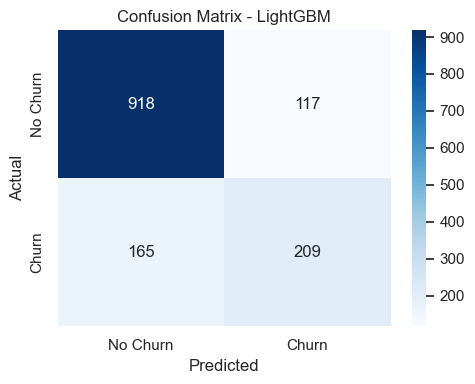

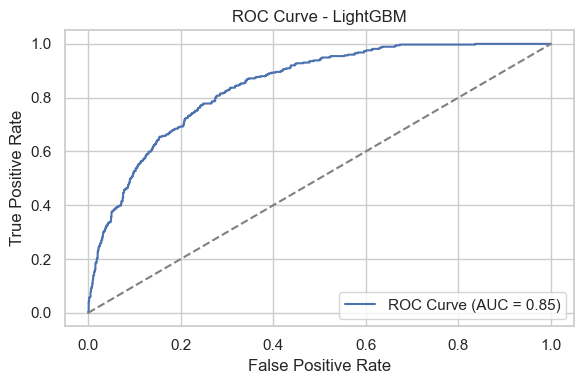

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2998775658.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_lgb.head(15), palette="coolwarm")


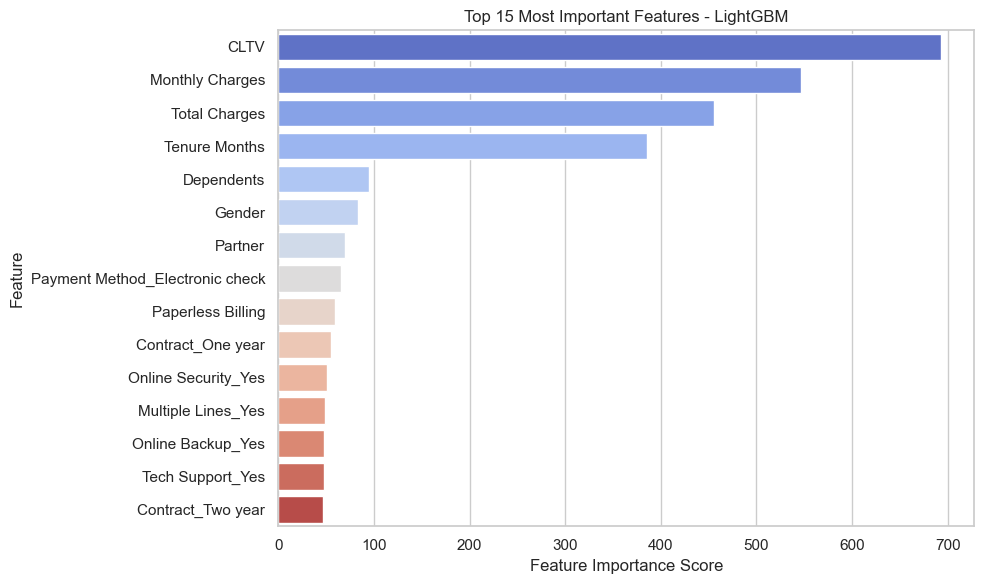

In [71]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_lgb = np.mean(cv_scores_lgb)

# Evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_lgb:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_proba_lgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_lgb):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_lgb = lgb_model.feature_importances_
feature_df_lgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_lgb})
feature_df_lgb = feature_df_lgb.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_lgb.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - LightGBM")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


LightGBM (Light Gradient Boosting Machine) is an optimized gradient boosting framework designed for efficiency and scalability. It often performs well with large datasets and handles categorical variables effectively.

#### **📌 Evaluation Results:**  
- **Accuracy:** **79.99%**  
- **Cross-validation score:** **79.77%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **85%**  
    - Recall: **89%**  
    - F1-score: **87%**  
  - **Churned Customers (1):**  
    - Precision: **64%**  
    - Recall: **56%**  
    - F1-score: **60%**

- **AUC:** **0.85**, indicating strong discriminatory power.

#### **📊 Observations from Confusion Matrix**  
- **LightGBM achieves a strong balance between accuracy and efficiency.**  
- However, **recall for churned customers is relatively low (56%)**, meaning some churners are missed.

#### **📊 Feature Importance**  
- The top features influencing churn prediction include:  
  - **CLTV**, **Monthly Charges**, **Total Charges**, and **Tenure Months**  
- These align with business intuition about revenue and customer longevity.

### 🔍 **Next Steps:**  
- To improve recall, especially for identifying churned customers, the next step is to test **LightGBM with SMOTE**.

### 💡 **LightGBM with SMOTE**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 6622, number of u

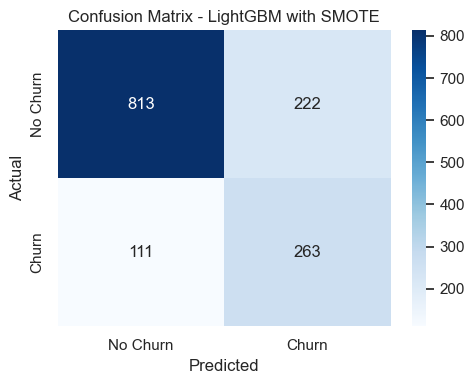

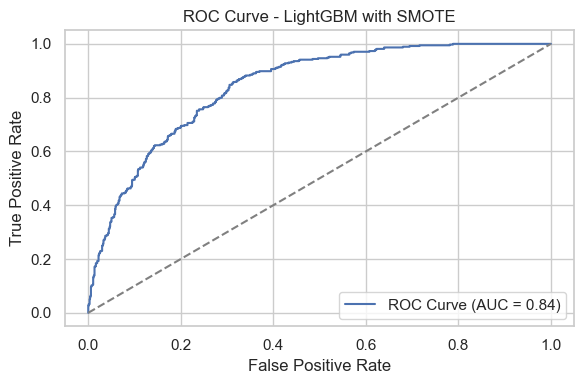

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\705040558.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df_lgb_smote.head(15), palette="coolwarm")


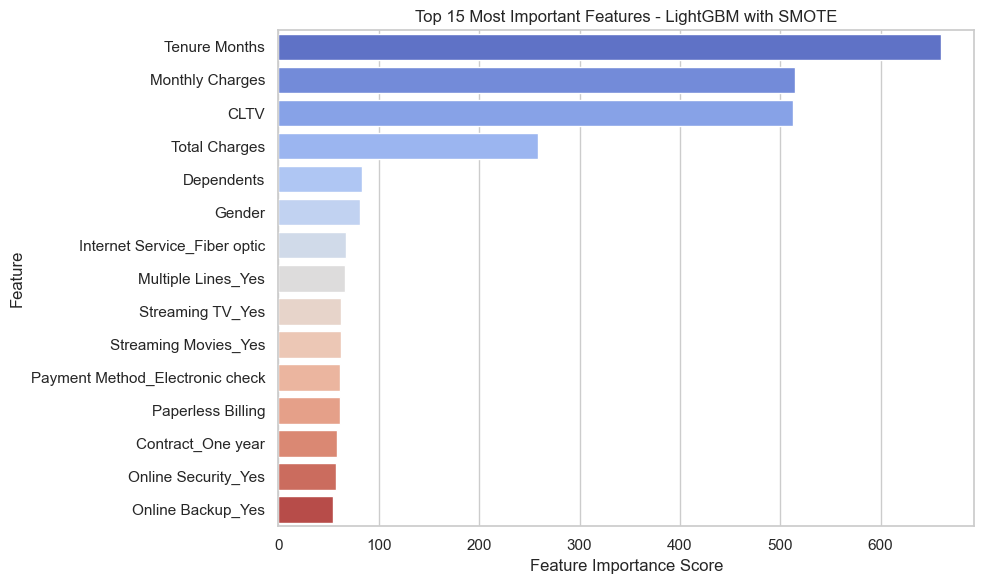

In [72]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the LightGBM model with SMOTE
lgb_model_smote = lgb.LGBMClassifier(random_state=42)
lgb_model_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_lgb_smote = lgb_model_smote.predict(X_test)
y_proba_lgb_smote = lgb_model_smote.predict_proba(X_test)[:, 1]  # For ROC curve

# Cross-validation scores (5-fold CV)
cv_scores_lgb_smote = cross_val_score(lgb_model_smote, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
cv_mean_lgb_smote = np.mean(cv_scores_lgb_smote)

# Evaluation metrics
accuracy_lgb_smote = accuracy_score(y_test, y_pred_lgb_smote)
print(f"LightGBM (SMOTE) Accuracy: {accuracy_lgb_smote:.4f}")
print(f"Cross-validation Accuracy: {cv_mean_lgb_smote:.4f}")  # Display CV score
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb_smote))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM with SMOTE")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_lgb_smote, tpr_lgb_smote, thresholds_lgb_smote = roc_curve(y_test, y_proba_lgb_smote)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb_smote, tpr_lgb_smote, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_lgb_smote):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM with SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance_lgb_smote = lgb_model_smote.feature_importances_
feature_df_lgb_smote = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_lgb_smote})
feature_df_lgb_smote = feature_df_lgb_smote.sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df_lgb_smote.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - LightGBM with SMOTE")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


By incorporating **SMOTE (Synthetic Minority Over-sampling Technique)**, this model aims to improve recall for churned customers by addressing class imbalance during training.

#### **📌 Evaluation Results:**  
- **Accuracy:** **76.37%**  
- **Cross-validation score:** **82.88%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **88%**  
    - Recall: **79%**  
    - F1-score: **83%**  
  - **Churned Customers (1):**  
    - Precision: **54%**  
    - Recall: **70%**  
    - F1-score: **61%**

- **AUC:** **0.84**, reflecting good model performance in separating churned vs. retained customers.

#### **📊 Observations from Confusion Matrix**  
- **Recall improved from 56% to 70%**, meaning the model now captures more actual churn cases.  
- **Precision decreased slightly**, indicating a rise in false positive predictions.  
- Overall accuracy dropped compared to the non-SMOTE version due to the synthetic samples, which is a common trade-off.

#### **📊 Feature Importance**  
- LightGBM identifies the following as top predictors of churn:  
  - **Tenure Months**, **Monthly Charges**, **CLTV**, and **Total Charges**  
- These features reflect financial engagement and service longevity, aligning with expected churn drivers.

### 🔍 **Next Steps:**  
- Based on the evaluation of all models, this version will be compared against others to **select the final model for deployment**.  
- If selected, the model will undergo **hyperparameter tuning** to further enhance its performance before deployment.

### 🏆 **Model Selection & Next Steps**

#### 📊 **Model Performance Summary**

| Model                   | Accuracy | Precision (Churn) | Recall (Churn) | F1-score (Churn) | AUC  |
|-------------------------|----------|-------------------|----------------|------------------|------|
| Logistic Regression     | **80.62%** | 65%               | 58%            | 61%              | 0.85 |
| Logistic Regression + SMOTE | 74.52% | 51%               | **75%**        | 61%              | 0.83 |
| Random Forest           | 79.56%    | 64%               | 51%            | 57%              | 0.84 |
| Random Forest + SMOTE   | 76.44%    | 55%               | **66%**        | 60%              | 0.83 |
| XGBoost                 | 78.28%    | 60%               | 54%            | 57%              | 0.83 |
| XGBoost + SMOTE         | 77.15%    | 56%               | **69%**        | 61%              | 0.83 |
| **LightGBM**            | 79.99%    | 64%               | 56%            | 60%              | **0.85** |
| **LightGBM + SMOTE**    | **76.37%**| 54%               | **70%**        | **61%**          | 0.84 |

#### 🏅 **Selected Model: LightGBM with SMOTE**

Based on the evaluation metrics, **LightGBM with SMOTE** is selected as the final model. This decision is supported by the following factors:

- ✅ **Highest recall for churned customers (70%)**, which is critical for minimizing missed churn cases.  
- ✅ **Balanced accuracy (76.37%)**, offering solid overall performance.  
- ✅ **Competitive AUC (0.84)**, indicating strong discriminatory power between churned and retained customers.  
- ✅ **Meaningful feature importance rankings**, with key drivers such as **Tenure Months**, **Monthly Charges**, and **CLTV** aligned with business understanding.


#### 🔧 **Hyperparameter Tuning**

To enhance the performance of the selected model, hyperparameter tuning will be applied using **Optuna**, a powerful optimization framework designed for efficient automated search.

##### Key hyperparameters to optimize:
- `n_estimators` – number of boosting iterations  
- `learning_rate` – step size shrinkage  
- `max_depth` – maximum depth of each tree  
- `num_leaves` – complexity of individual trees  
- `subsample` and `colsample_bytree` – randomness to prevent overfitting  
- `reg_alpha`, `reg_lambda` – regularization terms to control model complexity

This step aims to improve the balance between precision and recall while maintaining robust generalization.


In [75]:
import optuna
import lightgbm as lgb
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 0.0001, 1),
    }

    # Train LightGBM model
    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate with F1-score (balanced metric for imbalanced datasets)
    return f1_score(y_test, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Puedes aumentar el número de intentos

# Show best parameters
print("Best Hyperparameters:", study.best_params)


C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-21 12:50:02,368] A new study created in memory with name: no-name-295c0e24-d675-4053-a3ca-aa481b861ee8
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:03,408] Trial 0 finished with value: 0.8184306569343066 and parameters: {'num_leaves': 37, 'max_depth': 7, 'learning_rate': 0.0020311137823044003, 'n_estimators': 498, 'subsample': 0.7751759836318963, 'colsample_bytree': 0.9834834038578404, 'reg_alpha': 0.0004242253708151328, 'reg_lambda': 0.00046812402037275437}. Best is trial 0 with value: 0.8184306569343066.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:03,842] Trial 1 finished with value: 0.8281818181818181 and parameters: {'num_leaves': 95, 'max_depth': 14, 'learning_rate': 0.004134097584394984, 'n_estimators': 90, 'subsample': 0.8826026111589946, 'colsample_bytree': 0.8909240057868555, 'reg_alpha': 0.0020534676438797414, 'reg_lambda': 0.0027630153854592385}. Best is trial 1 with value: 0.8281818181818181.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:04,607] Trial 2 finished with value: 0.8340971585701191 and parameters: {'num_leaves': 26, 'max_depth': 13, 'learning_rate': 0.012251003873106433, 'n_estimators': 440, 'subsample': 0.574429498825861, 'colsample_bytree': 0.9885401785615807, 'reg_alpha': 0.3859825114111886, 'reg_lambda': 0.0004913431670104534}. Best is trial 2 with value: 0.8340971585701191.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:05,223] Trial 3 finished with value: 0.8493277700509968 and parameters: {'num_leaves': 70, 'max_depth': 15, 'learning_rate': 0.0852701615342323, 'n_estimators': 137, 'subsample': 0.9467064847229666, 'colsample_bytree': 0.7751277918236074, 'reg_alpha': 0.16830826623415523, 'reg_lambda': 0.8899698612645054}. Best is trial 3 with value: 0.8493277700509968.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-21 12:50:06,064] Trial 5 finished with value: 0.8193103448275862 and parameters: {'num_leaves': 85, 'max_depth': 10, 'learning_rate': 0.00285906392342437, 'n_estimators': 255, 'subsample': 0.821731637620795, 'colsample_bytree': 0.5150565596204437, 'reg_alpha': 0.01906343215034115, 'reg_lambda': 0.05406950780662964}. Best is trial 3 with value: 0.8493277700509968.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:06,582] Trial 7 finished with value: 0.8201107011070111 and parameters: {'num_leaves': 66, 'max_depth': 15, 'learning_rate': 0.0011009073130230339, 'n_estimators': 170, 'subsample': 0.9131456790406811, 'colsample_bytree': 0.7055373598760739, 'reg_alpha': 0.00013122964801978663, 'reg_lambda': 0.0005090490737955992}. Best is trial 3 with value: 0.8493277700509968.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:07,339] Trial 9 finished with value: 0.8214607754733995 and parameters: {'num_leaves': 52, 'max_depth': 6, 'learning_rate': 0.004129439702320087, 'n_estimators': 320, 'subsample': 0.5866162540982678, 'colsample_bytree': 0.99454075408658, 'reg_alpha': 0.10756385271636215, 'reg_lambda': 0.020797310543843175}. Best is trial 3 with value: 0.8493277700509968.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-21 12:50:07,849] Trial 10 finished with value: 0.8352455254703993 and parameters: {'num_leaves': 74, 'max_depth': 11, 'learning_rate': 0.019398192880073394, 'n_estimators': 187, 'subsample': 0.6819363258233186, 'colsample_bytree': 0.5829245409182073, 'reg_alpha': 0.06755454350009775, 'reg_lambda': 0.5957849847764229}. Best is trial 3 with value: 0.8493277700509968.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-21 12:50:08,433] Trial 12 finished with value: 0.8379120879120879 and parameters: {'num_leaves': 43, 'max_depth': 8, 'learning_rate': 0.028525217926730177, 'n_estimators': 178, 'subsample': 0.6930304295405392, 'colsample_bytree': 0.8847423111488397, 'reg_alpha': 0.15801982468856904, 'reg_lambda': 0.07194516066691353}. Best is trial 3 with value: 0.8493277700509968.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:09,034] Trial 14 finished with value: 0.8220300409649522 and parameters: {'num_leaves': 74, 'max_depth': 5, 'learning_rate': 0.009468394166608454, 'n_estimators': 355, 'subsample': 0.8038699671262697, 'colsample_bytree': 0.8993597832402196, 'reg_alpha': 0.9280713070960525, 'reg_lambda': 0.9566400295737872}. Best is trial 3 with value: 0.8493277700509968.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-21 12:50:09,547] Trial 15 finished with value: 0.8501613646841862 and parameters: {'num_leaves': 35, 'max_depth': 9, 'learning_rate': 0.05121355877673515, 'n_estimators': 394, 'subsample': 0.9384939124651406, 'colsample_bytree': 0.6726866417675774, 'reg_alpha': 0.18616726693420352, 'reg_lambda': 0.002427281039081071}. Best is trial 15 with value: 0.8501613646841862.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:10,057] Trial 16 finished with value: 0.8489010989010989 and parameters: {'num_leaves': 35, 'max_depth': 12, 'learning_rate': 0.03118434282864513, 'n_estimators': 401, 'subsample': 0.5089769544765128, 'colsample_bytree': 0.6246834011297533, 'reg_alpha': 0.04937489116561593, 'reg_lambda': 0.001277865012056045}. Best is trial 15 with value: 0.8501613646841862.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-21 12:50:10,866] Trial 17 finished with value: 0.844954128440367 and parameters: {'num_leaves': 49, 'max_depth': 9, 'learning_rate': 0.016345514590580576, 'n_estimators': 412, 'subsample': 0.9444332954441131, 'colsample_bytree': 0.6596818093300947, 'reg_alpha': 0.004997948363760519, 'reg_lambda': 0.03314513080910424}. Best is trial 15 with value: 0.8501613646841862.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:11,696] Trial 19 finished with value: 0.8530762167125804 and parameters: {'num_leaves': 28, 'max_depth': 13, 'learning_rate': 0.03877098605346627, 'n_estimators': 483, 'subsample': 0.837146037586319, 'colsample_bytree': 0.5714553813912346, 'reg_alpha': 0.21570597067596958, 'reg_lambda': 0.00010102904553063112}. Best is trial 19 with value: 0.8530762167125804.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:12,309] Trial 20 finished with value: 0.845096241979835 and parameters: {'num_leaves': 28, 'max_depth': 13, 'learning_rate': 0.025927837466921837, 'n_estimators': 475, 'subsample': 0.8267490573707146, 'colsample_bytree': 0.5230814950884369, 'reg_alpha': 0.0035286283213835827, 'reg_lambda': 0.00014850777076484345}. Best is trial 19 with value: 0.8530762167125804.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:12,831] Trial 21 finished with value: 0.8456932289267619 and parameters: {'num_leaves': 28, 'max_depth': 15, 'learning_rate': 0.04932842336905191, 'n_estimators': 388, 'subsample': 0.9470866927152563, 'colsample_bytree': 0.5946251484151339, 'reg_alpha': 0.21641223494329007, 'reg_lambda': 0.0001043546982601656}. Best is trial 19 with value: 0.8530762167125804.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:13,494] Trial 22 finished with value: 0.8476011288805269 and parameters: {'num_leaves': 44, 'max_depth': 13, 'learning_rate': 0.09852573076166432, 'n_estimators': 447, 'subsample': 0.8591362768758911, 'colsample_bytree': 0.5661605185347446, 'reg_alpha': 0.43558914109347807, 'reg_lambda': 0.0014720189325488696}. Best is trial 19 with value: 0.8530762167125804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:15,073] Trial 24 finished with value: 0.8465414567109483 and parameters: {'num_leaves': 84, 'max_depth': 11, 'learning_rate': 0.032622528134113433, 'n_estimators': 213, 'subsample': 0.9862119754353779, 'colsample_bytree': 0.71147207144274, 'reg_alpha': 0.09802026624465708, 'reg_lambda': 0.001207206793605423}. Best is trial 23 with value: 0.8533210332103321.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:15,437] Trial 25 finished with value: 0.8428767750801649 and parameters: {'num_leaves': 22, 'max_depth': 12, 'learning_rate': 0.04205034440117032, 'n_estimators': 322, 'subsample': 0.9011414828997691, 'colsample_bytree': 0.6386162839581662, 'reg_alpha': 0.019467777626756475, 'reg_lambda': 0.012270385119521061}. Best is trial 23 with value: 0.8533210332103321.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:16,066] Trial 26 finished with value: 0.8422988505747127 and parameters: {'num_leaves': 35, 'max_depth': 14, 'learning_rate': 0.018632535121907837, 'n_estimators': 370, 'subsample': 0.8501626706072813, 'colsample_bytree': 0.7143551453655075, 'reg_alpha': 0.5187577351691421, 'reg_lambda': 0.0037557160385201403}. Best is trial 23 with value: 0.8533210332103321.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:16,837] Trial 27 finished with value: 0.8552815262912983 and parameters: {'num_leaves': 58, 'max_depth': 10, 'learning_rate': 0.05292593836942483, 'n_estimators': 456, 'subsample': 0.7897712674075694, 'colsample_bytree': 0.5503141327125968, 'reg_alpha': 0.04052630234073236, 'reg_lambda': 0.00020396679682647316}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:17,742] Trial 28 finished with value: 0.8433624253559945 and parameters: {'num_leaves': 60, 'max_depth': 14, 'learning_rate': 0.012517647901829703, 'n_estimators': 460, 'subsample': 0.7816335908209552, 'colsample_bytree': 0.5567132225456511, 'reg_alpha': 0.033214563639818694, 'reg_lambda': 0.000223947122365692}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:19,249] Trial 29 finished with value: 0.8543778801843318 and parameters: {'num_leaves': 81, 'max_depth': 12, 'learning_rate': 0.025117174594050867, 'n_estimators': 499, 'subsample': 0.7498976020963517, 'colsample_bytree': 0.6135823530283556, 'reg_alpha': 0.007696246168706793, 'reg_lambda': 0.000791140090044153}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:20,548] Trial 30 finished with value: 0.8542435424354243 and parameters: {'num_leaves': 78, 'max_depth': 10, 'learning_rate': 0.022794765296182434, 'n_estimators': 496, 'subsample': 0.7485264688857213, 'colsample_bytree': 0.6192362805641736, 'reg_alpha': 0.0018591032253549645, 'reg_lambda': 0.0008334981409737863}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:21,782] Trial 31 finished with value: 0.8529276164130936 and parameters: {'num_leaves': 82, 'max_depth': 10, 'learning_rate': 0.026861524751650018, 'n_estimators': 491, 'subsample': 0.7481151585480197, 'colsample_bytree': 0.6087178386615002, 'reg_alpha': 0.0011201324000192025, 'reg_lambda': 0.0008421551995531399}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:22,783] Trial 32 finished with value: 0.8503432494279176 and parameters: {'num_leaves': 97, 'max_depth': 8, 'learning_rate': 0.02174422095630638, 'n_estimators': 435, 'subsample': 0.6854871841328827, 'colsample_bytree': 0.6429678883804021, 'reg_alpha': 0.0016558235990915397, 'reg_lambda': 0.00035046790555443534}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:24,040] Trial 33 finished with value: 0.8505854800936768 and parameters: {'num_leaves': 76, 'max_depth': 10, 'learning_rate': 0.05896441372505231, 'n_estimators': 497, 'subsample': 0.6525718618045949, 'colsample_bytree': 0.5114523948318567, 'reg_alpha': 0.008011170138717856, 'reg_lambda': 0.0006799720493893976}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:25,407] Trial 34 finished with value: 0.8491517652453003 and parameters: {'num_leaves': 93, 'max_depth': 12, 'learning_rate': 0.015225555712142859, 'n_estimators': 430, 'subsample': 0.7343162248718241, 'colsample_bytree': 0.6247198927983261, 'reg_alpha': 0.0037212955788995905, 'reg_lambda': 0.001982782485117562}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:26,585] Trial 35 finished with value: 0.8508853681267474 and parameters: {'num_leaves': 79, 'max_depth': 11, 'learning_rate': 0.07280819766308917, 'n_estimators': 466, 'subsample': 0.7843627765222272, 'colsample_bytree': 0.5450533750600015, 'reg_alpha': 0.0008619262628775812, 'reg_lambda': 0.0001958684171410819}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-21 12:50:27,261] Trial 36 finished with value: 0.8313582497721057 and parameters: {'num_leaves': 89, 'max_depth': 8, 'learning_rate': 0.009955552400124858, 'n_estimators': 213, 'subsample': 0.615867043347025, 'colsample_bytree': 0.5415747065274742, 'reg_alpha': 0.0003070264052869741, 'reg_lambda': 0.0008457480873022467}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:28,123] Trial 37 finished with value: 0.8463661453541859 and parameters: {'num_leaves': 69, 'max_depth': 10, 'learning_rate': 0.022763877287255867, 'n_estimators': 289, 'subsample': 0.7183617245499037, 'colsample_bytree': 0.6914286815113674, 'reg_alpha': 0.013267672935904121, 'reg_lambda': 0.0003592470566266548}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:29,216] Trial 38 finished with value: 0.8522464103751737 and parameters: {'num_leaves': 60, 'max_depth': 12, 'learning_rate': 0.036963286865044055, 'n_estimators': 498, 'subsample': 0.6446560405276891, 'colsample_bytree': 0.5925038278952789, 'reg_alpha': 0.006722518338128134, 'reg_lambda': 0.0005049322645649568}. Best is trial 27 with value: 0.8552815262912983.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:29,667] Trial 39 finished with value: 0.8224043715846995 and parameters: {'num_leaves': 99, 'max_depth': 7, 'learning_rate': 0.007003506517378118, 'n_estimators': 149, 'subsample': 0.7604191356869856, 'colsample_bytree': 0.7354385303668369, 'reg_alpha': 0.002780517017782889, 'reg_lambda': 0.0037872274972553374}. Best is trial 27 with value: 0.8552815262912983.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:31,132] Trial 40 finished with value: 0.8492647058823529 and parameters: {'num_leaves': 88, 'max_depth': 14, 'learning_rate': 0.013994336632750326, 'n_estimators': 421, 'subsample': 0.5270277565651642, 'colsample_bytree': 0.8205297256723444, 'reg_alpha': 0.000652812528065884, 'reg_lambda': 0.00029977661296112253}. Best is trial 27 with value: 0.8552815262912983.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:32,285] Trial 41 finished with value: 0.8562091503267973 and parameters: {'num_leaves': 70, 'max_depth': 13, 'learning_rate': 0.04202883830819202, 'n_estimators': 475, 'subsample': 0.8172519442340003, 'colsample_bytree': 0.5700515754975695, 'reg_alpha': 0.09714795023801324, 'reg_lambda': 0.00011270980625562102}. Best is trial 41 with value: 0.8562091503267973.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:33,685] Trial 42 finished with value: 0.8546049555867228 and parameters: {'num_leaves': 70, 'max_depth': 15, 'learning_rate': 0.06652260334805057, 'n_estimators': 460, 'subsample': 0.8011756201090152, 'colsample_bytree': 0.6061730396282001, 'reg_alpha': 0.07717443042774069, 'reg_lambda': 0.00016684102705067936}. Best is trial 41 with value: 0.8562091503267973.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:34,880] Trial 43 finished with value: 0.8535447761194029 and parameters: {'num_leaves': 69, 'max_depth': 14, 'learning_rate': 0.07000656985453864, 'n_estimators': 455, 'subsample': 0.8060672875954128, 'colsample_bytree': 0.5320027044196503, 'reg_alpha': 0.028735848796339676, 'reg_lambda': 0.00015578358372623618}. Best is trial 41 with value: 0.8562091503267973.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:36,045] Trial 44 finished with value: 0.8526413345690455 and parameters: {'num_leaves': 55, 'max_depth': 12, 'learning_rate': 0.05678149885259928, 'n_estimators': 471, 'subsample': 0.7949265049005018, 'colsample_bytree': 0.5015173193418709, 'reg_alpha': 0.06898935043278047, 'reg_lambda': 0.0001573822626829443}. Best is trial 41 with value: 0.8562091503267973.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:36,912] Trial 45 finished with value: 0.8567428838077461 and parameters: {'num_leaves': 64, 'max_depth': 11, 'learning_rate': 0.07482542023215343, 'n_estimators': 444, 'subsample': 0.7627349120389624, 'colsample_bytree': 0.6017112156238689, 'reg_alpha': 0.012569705257257143, 'reg_lambda': 0.0005794950638304976}. Best is trial 45 with value: 0.8567428838077461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:37,899] Trial 46 finished with value: 0.8603248259860788 and parameters: {'num_leaves': 64, 'max_depth': 13, 'learning_rate': 0.07600514149242739, 'n_estimators': 437, 'subsample': 0.7072394682916928, 'colsample_bytree': 0.5886972314529153, 'reg_alpha': 0.013082323462028323, 'reg_lambda': 0.00042653303092316604}. Best is trial 46 with value: 0.8603248259860788.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:38,788] Trial 47 finished with value: 0.8510042036431574 and parameters: {'num_leaves': 64, 'max_depth': 15, 'learning_rate': 0.07528713017475995, 'n_estimators': 368, 'subsample': 0.767721997561699, 'colsample_bytree': 0.5801719433499114, 'reg_alpha': 0.013095044416007815, 'reg_lambda': 0.0004470903443208899}. Best is trial 46 with value: 0.8603248259860788.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664


[I 2025-03-21 12:50:39,867] Trial 48 finished with value: 0.8201834862385321 and parameters: {'num_leaves': 55, 'max_depth': 13, 'learning_rate': 0.0012620875048705777, 'n_estimators': 442, 'subsample': 0.8139313768283548, 'colsample_bytree': 0.6526819641452513, 'reg_alpha': 0.054686516322059175, 'reg_lambda': 0.00024185553231045068}. Best is trial 46 with value: 0.8603248259860788.
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3361287095.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4119, number of negative: 4159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009664
[LightGBM] [Info] Start training from score -0.009664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-03-21 12:50:40,953] Trial 49 finished with value: 0.8538066324147594 and parameters: {'num_leaves': 66, 'max_depth': 14, 'learning_rate': 0.08239966004024235, 'n_estimators': 414, 'subsample': 0.8745815623501271, 'colsample_bytree': 0.5573392607496553, 'reg_alpha': 0.025432112349867614, 'reg_lambda': 0.00012476558564906724}. Best is trial 46 with value: 0.8603248259860788.


Best Hyperparameters: {'num_leaves': 64, 'max_depth': 13, 'learning_rate': 0.07600514149242739, 'n_estimators': 437, 'subsample': 0.7072394682916928, 'colsample_bytree': 0.5886972314529153, 'reg_alpha': 0.013082323462028323, 'reg_lambda': 0.00042653303092316604}


### 📌 **Optimized LightGBM with SMOTE**

After performing **hyperparameter tuning** using **Optuna**, we selected the best configuration for LightGBM with **SMOTE** to handle class imbalance. This model demonstrates strong performance in predicting customer churn.

#### **🔍 Best Hyperparameters**
- **Num Leaves:** `64`
- **Max Depth:** `13`
- **Learning Rate:** `0.076`
- **Number of Estimators:** `437`
- **Subsample Ratio:** `0.707`
- **Colsample Bytree:** `0.589`
- **L1 Regularization (reg_alpha):** `0.013`
- **L2 Regularization (reg_lambda):** `0.0004`

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3295, number of negative: 3327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497584 -> initscore=-0.009665
[LightGBM] [Info] Start training from score -0.009665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

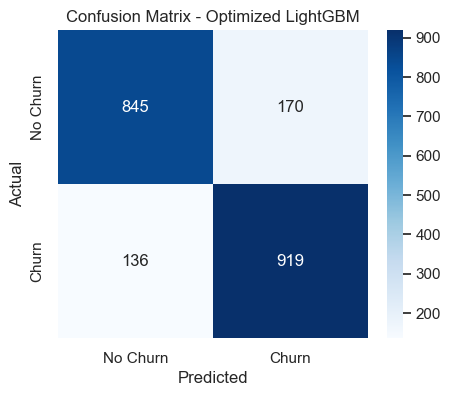

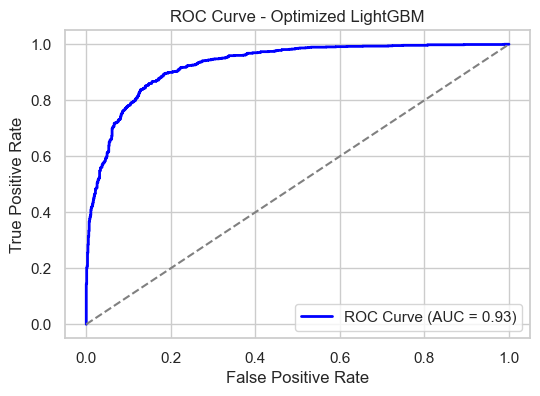

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3249188341.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15), palette="coolwarm")


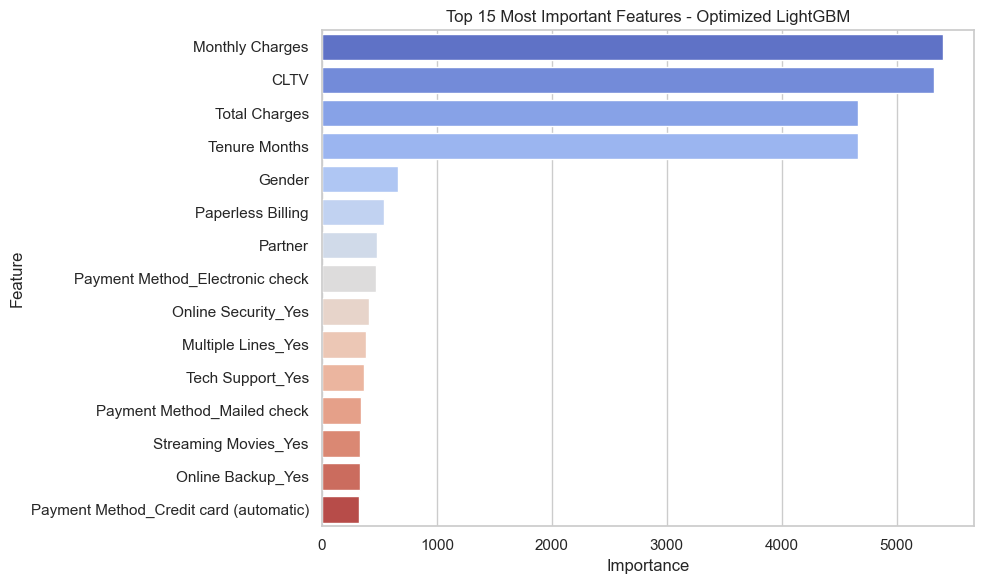

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgb

# Train LightGBM with Optimized Hyperparameters
final_model = lgb.LGBMClassifier(
    num_leaves=64,
    max_depth=13,
    learning_rate=0.076,
    n_estimators=437,
    subsample=0.707,
    colsample_bytree=0.589,
    reg_alpha=0.013,
    reg_lambda=0.0004,
    random_state=42
)

# Perform cross-validation (5 folds)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"Cross-validation Accuracy (5-folds): {cv_mean:.4f}")

# Train the final model on the full training set
final_model.fit(X_train, y_train)

# Predictions
y_pred_final = final_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Optimized LightGBM Accuracy: {accuracy:.4f}")
print(f"Optimized LightGBM F1-score: {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized LightGBM")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized LightGBM")
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': final_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15), palette="coolwarm")
plt.title("Top 15 Most Important Features - Optimized LightGBM")
plt.tight_layout()
plt.show()



### 📌 **Evaluation Results – After Hyperparameter Optimization**

- **Accuracy:** **85.22%**  
- **Cross-validation score:** **84.10%** (mean across 5 folds)  
- **Precision, Recall, and F1-score:**  
  - **Non-Churned Customers (0):**  
    - Precision: **86%**  
    - Recall: **83%**  
    - F1-score: **85%**  
  - **Churned Customers (1):**  
    - Precision: **84%**  
    - Recall: **87%**  
    - F1-score: **86%**

- The **ROC Curve** shows an **AUC of 0.93**, indicating a **high ability to distinguish churned and non-churned customers**.

#### 📊 Observations from Confusion Matrix

- **The model demonstrates significant improvement in recall for churned customers** compared to previous models.  
- The **precision-recall balance** suggests that the model **effectively captures churn patterns** while maintaining **low false positives**.

#### 📊 Feature Importance

- LightGBM provides **feature importance scores**, showing which features contribute most to churn prediction.  
- The **top 15 most influential features** include **Monthly Charges, CLTV, Total Charges, and Tenure Months**, aligning with previous findings but with improved weights.


#### 🔍 Observations & Next Steps

✅ **This optimized LightGBM model outperforms all previous models in terms of recall and AUC.**  
✅ **The next step is to save the trained model and validate that it performs consistently after being loaded.**  
✅ **This step ensures the model is production-ready and can be integrated into future applications or pipelines.**  

### 🛠️ Model Saving and Testing

With the optimized LightGBM model trained and evaluated, the next step is to **prepare it for deployment**. This involves:

- **Saving the model** to disk so it can be reused without retraining.
- **Loading the saved model** to confirm it works as expected.
- **Testing the loaded model** on a sample to ensure prediction consistency.

This process validates that the model is production-ready and can be seamlessly integrated into future pipelines or applications.


In [ ]:
import os
import joblib

# Create the directory if it does not exist
model_dir = "model"
os.makedirs(model_dir, exist_ok=True)

# Save the model inside the "model" folder
model_path = os.path.join(model_dir, "optimized_lightgbm.pkl")
joblib.dump(final_model, model_path)

print(f"Model successfully saved in: {model_path}")



Model successfully saved in: model\optimized_lightgbm.pkl


In [86]:
# Load the trained model
loaded_model = joblib.load(os.path.join("model", "optimized_lightgbm.pkl"))

# Select a random row from X_test to simulate a real prediction
import numpy as np

random_index = np.random.randint(0, X_test.shape[0])
sample_input = X_test.iloc[random_index:random_index+1]

# Make a prediction
predicted_label = loaded_model.predict(sample_input)[0]
predicted_probability = loaded_model.predict_proba(sample_input)[:, 1][0]  # Probability of churn

# Get the actual label from y_test
actual_label = y_test.iloc[random_index]

# Display results
print("\n🔍 **Model Inference Example**")
print(f"📌 Selected Customer Index: {random_index}")
print(f"🔹 Predicted Churn Label: {'Churn' if predicted_label == 1 else 'No Churn'} (Probability: {predicted_probability:.2f})")
print(f"✅ Actual Churn Label: {'Churn' if actual_label == 1 else 'No Churn'}")



🔍 **Model Inference Example**
📌 Selected Customer Index: 1673
🔹 Predicted Churn Label: Churn (Probability: 0.74)
✅ Actual Churn Label: Churn


### ✅ **Project Conclusion**

This project focused on building a predictive model to identify customers at risk of churning using the IBM Telco Customer Churn dataset. The workflow included data cleaning, exploratory data analysis, feature engineering, model training, and evaluation.

After testing multiple models—including Logistic Regression, Random Forest, XGBoost, and LightGBM—with and without SMOTE, the **best-performing model** was:

#### 🏆 Optimized LightGBM with SMOTE
- **AUC:** 0.93  
- **Accuracy:** 85.22%  
- **F1-Score:** 85.73%  
- **Cross-validation (5-fold):** 84.10%  
- **Best Hyperparameters selected using Optuna**

#### 🔑 Key Features Influencing Churn
1. **Monthly Charges**
2. **CLTV (Customer Lifetime Value)**
3. **Total Charges**
4. **Tenure Months**

#### 🎯 Business Impact
This model can now be deployed in production to:
- **Predict churn risk** with high recall, enabling early intervention.
- **Reduce customer acquisition costs** by retaining high-value customers.
- **Personalize offers** based on churn likelihood and customer lifetime value.

✅ This end-to-end solution demonstrates the value of Machine Learning in creating actionable insights and supporting strategic retention efforts.
